In [ ]:
# Step 1: Install required packages (if not already installed)
!pip install pandas matplotlib seaborn

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Saving posts_by_month.csv to posts_by_month.csv
Saving posts_by_quarter_origin.csv to posts_by_quarter_origin.csv


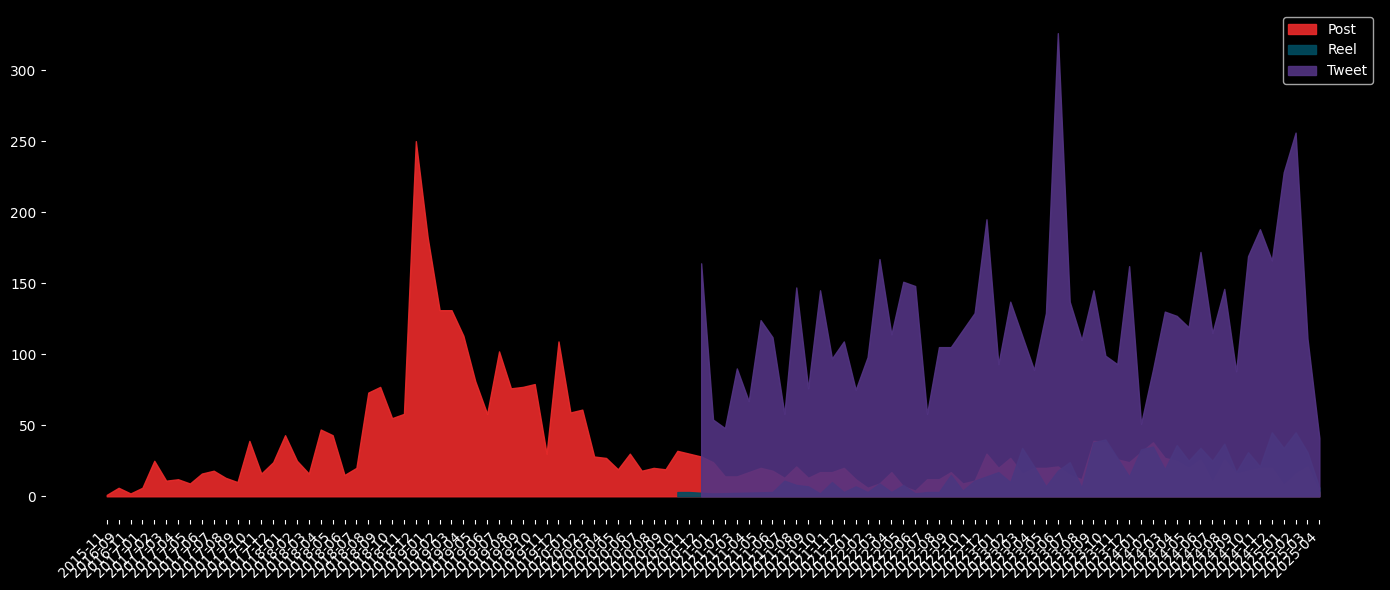

In [ ]:
# Step 1: Install required packages (if not already installed)
!pip install pandas matplotlib seaborn

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 3: Upload CSV files
uploaded = files.upload()  # Upload both `posts_by_month.csv` and `posts_by_quarter_origin.csv`

# Step 4: Load the monthly dataset
df_month = pd.read_csv('posts_by_month.csv')

# Step 5: Set up your color palette
origin_colors = {
    'Post': '#ec2b2bff',
    'Reel': '#004d61ff',
    'Tweet': '#533483'
}

# Step 6: Plot area chart
plt.figure(figsize=(14, 6))
for origin in df_month['Origin'].unique():
    subset = df_month[df_month['Origin'] == origin]
    plt.fill_between(subset['month'], subset['n'],
                     label=origin,
                     alpha=0.9,
                     color=origin_colors.get(origin, 'gray'))

# Styling
plt.xticks(rotation=45, ha='right')
plt.yticks(color='white')
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='', facecolor='black', labelcolor='white')
plt.grid(False)
plt.tight_layout()

# Apply white axis styling
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

<ipython-input-4-c4528d9bc017>:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


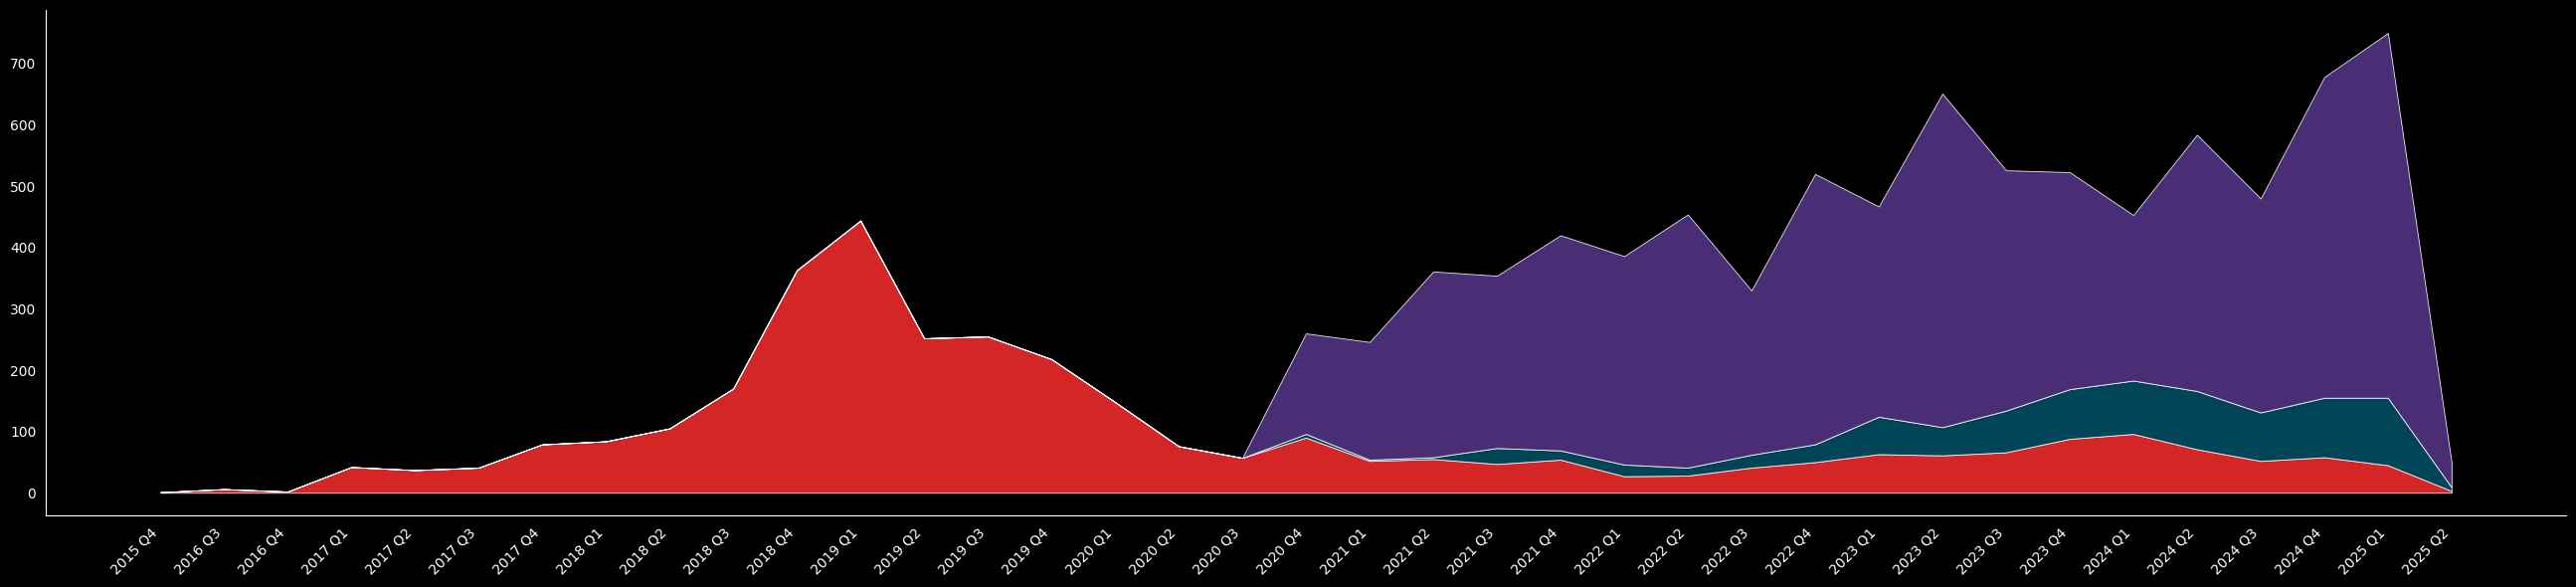

In [ ]:
# Step 1: Load the data
df_quarter = pd.read_csv('posts_by_quarter_origin.csv')

# Step 2: Sort quarters & fix Origin as categorical (for consistent color mapping)
df_quarter['quarter'] = pd.Categorical(df_quarter['quarter'],
                                       categories=sorted(df_quarter['quarter'].unique()),
                                       ordered=True)
df_quarter['Origin'] = df_quarter['Origin'].astype(str)

# Step 3: Color palette
origin_colors = {
    'Post': '#ec2b2bff',
    'Reel': '#004d61ff',
    'Tweet': '#533483'
}

# Step 4: Set up the plot
plt.figure(figsize=(26, 6))  # Wide plot

# Step 5: Plot each Origin manually to stack
bottom = pd.Series([0] * len(df_quarter['quarter'].unique()), index=sorted(df_quarter['quarter'].unique()))

for origin in ['Post', 'Reel', 'Tweet']:
    subset = df_quarter[df_quarter['Origin'] == origin]
    subset = subset.set_index('quarter').reindex(bottom.index, fill_value=0)
    plt.fill_between(bottom.index,
                     bottom,
                     bottom + subset['n'],
                     color=origin_colors[origin],
                     edgecolor='white',
                     linewidth=0.6,
                     alpha=0.9)
    bottom += subset['n']

# Style
plt.gca().set_facecolor('black')
plt.gcf().patch.set_facecolor('black')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.xlabel('')
plt.ylabel('')

# Remove grid, legend, and title
plt.grid(False)
plt.title('')
plt.legend().remove()

# Add white X and Y axis lines
ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [4]:
from google.colab import files
uploaded = files.upload()


Saving sewclean.csv to sewclean.csv


In [ ]:
# Step 3: Read CSV and set font
df = pd.read_csv("sewclean.csv")


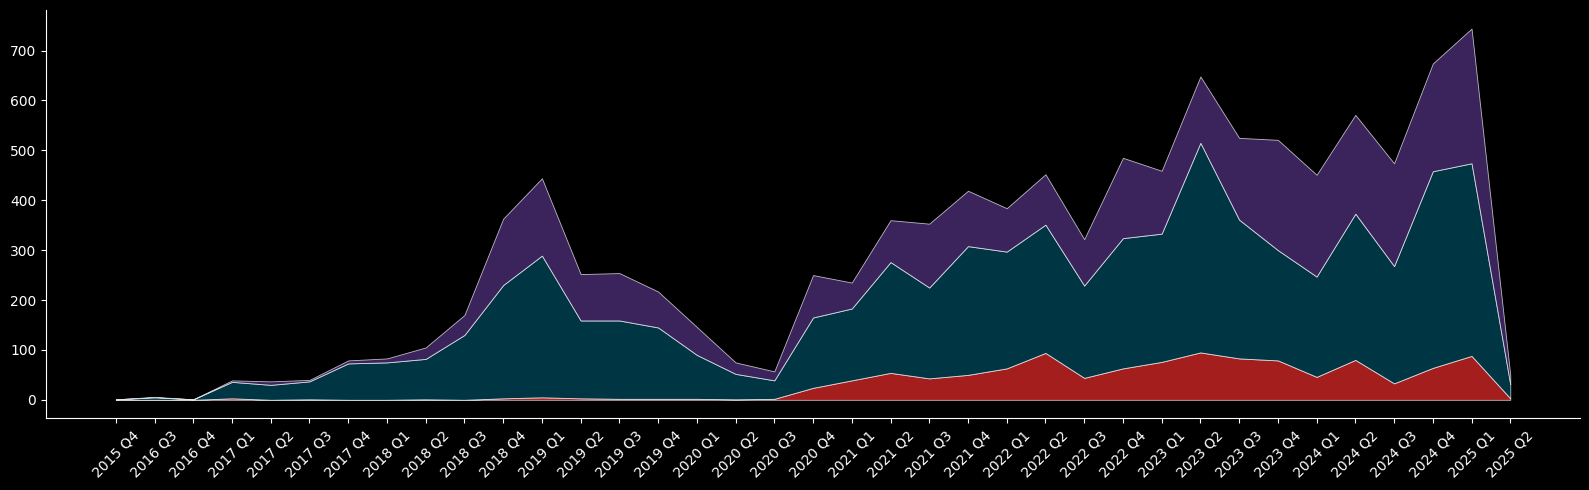

In [ ]:
# Step 1: Group by quarter and sentiment
quarterly_sentiment = (
    df.groupby(['quarter', 'sentiment'])
    .size()
    .reset_index(name='count')
)

# Step 2: Pivot to wide format
pivot_df = quarterly_sentiment.pivot(index='quarter', columns='sentiment', values='count').fillna(0)

# Step 3: Order quarters and fix sentiment order
pivot_df = pivot_df.sort_index()
pivot_df = pivot_df[['negative', 'neutral', 'positive']]

# Step 4: Define colors
colors = {
    "negative": "#ec2b2bff",
    "neutral": "#004d61ff",
    "positive": "#533483"
}

# Step 5: Plot using custom fill with white border
plt.figure(figsize=(16, 5))

bottom = pd.Series([0] * len(pivot_df), index=pivot_df.index)
for sentiment in pivot_df.columns:
    subset = pivot_df[sentiment]
    plt.fill_between(
        pivot_df.index,
        bottom,
        bottom + subset,
        color=colors[sentiment],
        edgecolor='white',
        linewidth=0.6,
        alpha=0.7
    )
    bottom += subset

# Step 6: Styling
plt.xticks(color='white', rotation=45)
plt.yticks(color='white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(colors='white')
plt.grid(False)
plt.title('', fontsize=1)

# Background
plt.gcf().patch.set_facecolor('black')
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()



##SOURCE COUNT AND TIMELINE


In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
!pip install squarify

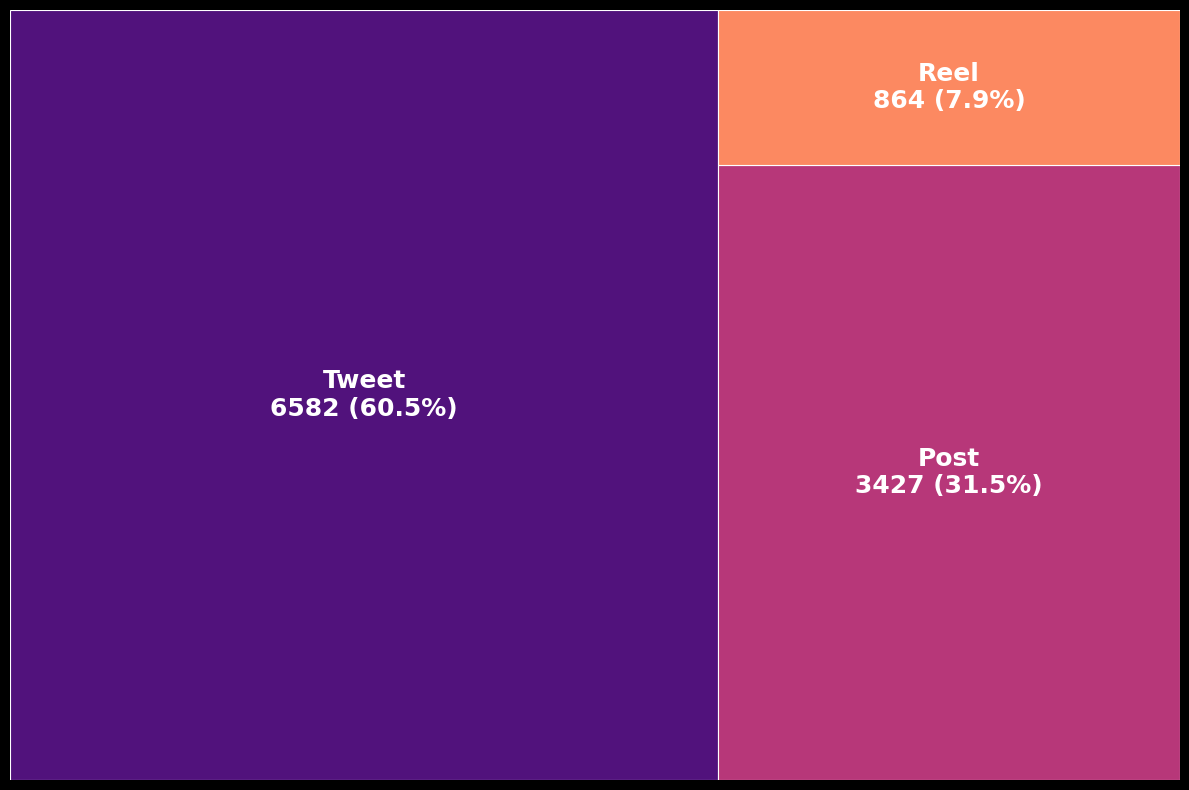

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex
from scipy.interpolate import make_interp_spline

# ─── 1) Load your data ─────────────────────────────────────────────
df = pd.read_csv("sewclean.csv")
assert "Origin" in df.columns, "No `Origin` column found"

# ─── 2) Prepare counts & palette ─────────────────────────────────
origin_counts = (
    df["Origin"]
      .value_counts()
      .reset_index(name="count")
)
origin_counts.columns = ["Origin", "count"]
origin_counts["pct"] = 100 * origin_counts["count"] / origin_counts["count"].sum()

# Replace the old label line with:
origin_counts["label"] = origin_counts.apply(
    lambda r: f"{r['Origin']}\n{r['count']} ({r['pct']:.1f}%)",
    axis=1
)
# Build a single magma palette for all Origins
palette = sns.color_palette("magma", n_colors=len(origin_counts))
hex_colors = [to_hex(c) for c in palette]

# Keep the exact order for both plots
ordered_origins = origin_counts["Origin"].tolist()

# ─── 3) TREEMAP ────────────────────────────────────────────────────
plt.figure(figsize=(12, 8), facecolor="black")
squarify.plot(
    sizes     = origin_counts["count"],
    label     = origin_counts["label"],
    color     = hex_colors,
    edgecolor = "white",
    linewidth = 0.8,
    text_kwargs = {"fontsize":18, "color":"white", "weight":"bold"}
)
plt.axis("off")
plt.gca().set_facecolor("black")
plt.tight_layout()
plt.show()



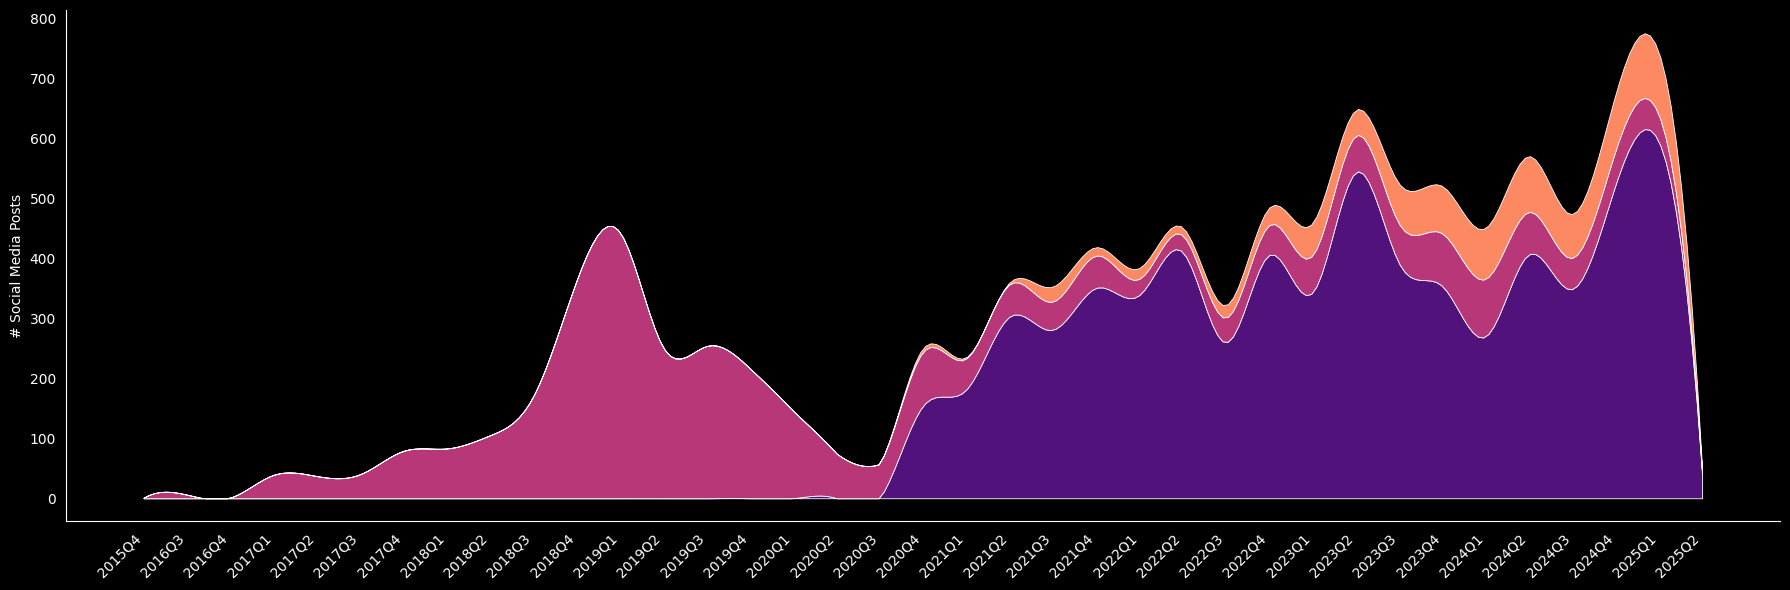

In [ ]:
# 4) TIMELINE by quarter using PeriodIndex (no warning)
df["quarter"] = pd.PeriodIndex(df["quarter"], freq="Q").astype(str)

trend = (
    df.groupby(["quarter","Origin"])
      .size()
      .reset_index(name="count")
)
pivot = trend.pivot(index="quarter", columns="Origin", values="count").fillna(0)
pivot = pivot[ordered_origins]

# 5) Smooth + clamp negatives to zero
x          = np.arange(len(pivot))
x_smooth   = np.linspace(x.min(), x.max(), 300)
cumulative = np.zeros_like(x_smooth)

fig, ax = plt.subplots(figsize=(18,6), facecolor="black")
for origin, color in zip(ordered_origins, hex_colors):
    y_raw    = pivot[origin].values
    y_spline = make_interp_spline(x, y_raw, k=3)(x_smooth)
    y_spline = np.clip(y_spline, 0, None)    # <— clamp negatives away
    ax.fill_between(
        x_smooth,
        cumulative,
        cumulative + y_spline,
        color=color,
        edgecolor="white",
        linewidth=0.6,
        alpha=1
    )
    cumulative += y_spline

# styling + y-label
ax.set_facecolor("black")
fig.patch.set_facecolor("black")
for sp in ["top","right"]:
    ax.spines[sp].set_visible(False)
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.tick_params(colors="white")

tick_pos = np.linspace(0, len(x)-1, len(pivot.index))
ax.set_xticks(tick_pos)
ax.set_xticklabels(pivot.index, rotation=45, ha="right", color="white")

ax.set_ylabel("# Social Media Posts", color="white")

plt.tight_layout()
plt.show()

## Origin Q4 2022

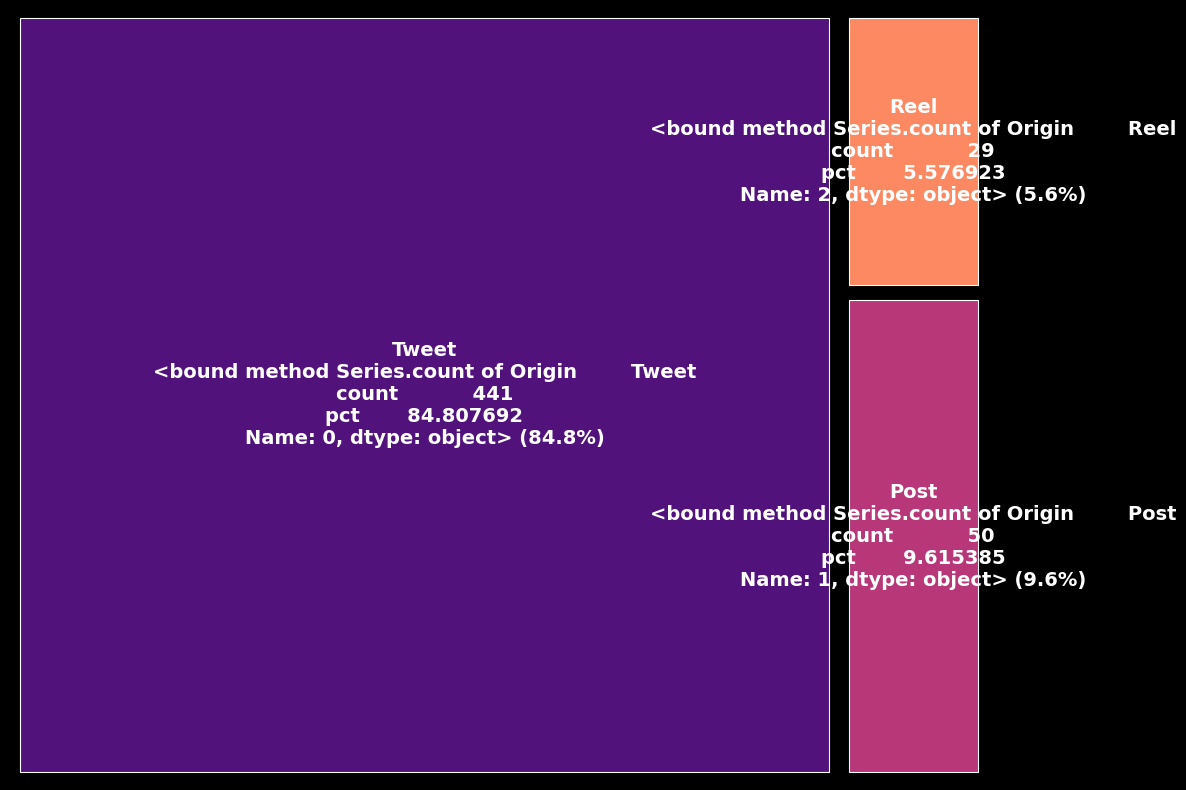

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex

# 1) Load your data
df = pd.read_csv("sewclean.csv")

# 2) Filter to Q4 2022
df_q4 = df[df["quarter"] == "2022 Q4"]
if df_q4.empty:
    raise ValueError("No data for 2022 Q4")

# 3) Compute counts & percentages of Origin
origin_counts = (
    df_q4["Origin"]
      .value_counts()
      .reset_index(name="count")
      .rename(columns={"index":"Origin"})
)
origin_counts["pct"] = 100 * origin_counts["count"] / origin_counts["count"].sum()

# 4) Build labels and magma palette
origin_counts["label"] = origin_counts.apply(
    lambda r: f"{r.Origin}\n{r.count} ({r.pct:.1f}%)", axis=1
)
palette    = sns.color_palette("magma", n_colors=len(origin_counts))
hex_colors = [to_hex(c) for c in palette]

# 5) Plot treemap with padding so labels never overflow
plt.figure(figsize=(12, 8), facecolor="black")
squarify.plot(
    sizes       = origin_counts["count"],
    label       = origin_counts["label"],
    color       = hex_colors,
    edgecolor   = "white",
    linewidth   = 0.8,
    pad         = True,               # ensure text is padded inside each rectangle
    text_kwargs = {
        "fontsize": 14,               # slightly smaller so it fits
        "color":    "white",
        "weight":   "bold"
    }
)
plt.axis("off")
plt.gca().set_facecolor("black")
plt.tight_layout()
plt.show()


## SENTIMENT COUNTS


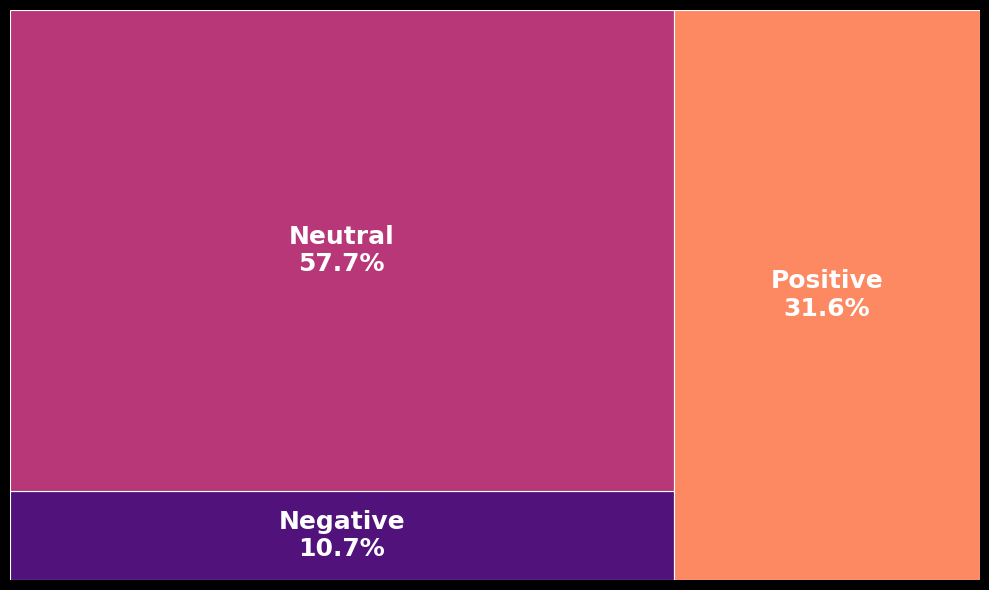

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from scipy.interpolate import make_interp_spline
from matplotlib.colors import to_hex

# 1) Load & prepare, drop missing sentiment
df = pd.read_csv("sewclean.csv", parse_dates=["date"])
df["sentiment"] = df["sentiment"].astype(str).str.title()
df = df[df["sentiment"].isin(["Negative","Neutral","Positive"])]

# ─── BUILD A CONSISTENT MAGMA PALETTE ──────────────────────────────
base_palette = sns.color_palette("magma", n_colors=3)
sentiments    = ["Negative","Neutral","Positive"]
color_map     = dict(zip(sentiments, [to_hex(c) for c in base_palette]))

# ─── 2) TREEMAP (percentages only) ─────────────────────────────────
sent_counts = (
    df["sentiment"]
      .value_counts()
      .reindex(sentiments)                     # ensure correct order
      .rename_axis("sentiment")
      .reset_index(name="count")
)
sent_counts["pct"]   = 100 * sent_counts["count"] / sent_counts["count"].sum()
sent_counts["label"] = sent_counts.apply(
    lambda r: f"{r['sentiment']}\n{r['pct']:.1f}%", axis=1
)
treemap_colors = [color_map[s] for s in sent_counts["sentiment"]]

plt.figure(figsize=(10,6), facecolor="black")
squarify.plot(
    sizes     = sent_counts["pct"],
    label     = sent_counts["label"],
    color     = treemap_colors,
    edgecolor = "white",
    linewidth = 0.8,
    text_kwargs={'fontsize':18, 'color':'white', 'weight':'bold'}
)
plt.axis("off")
plt.gca().set_facecolor("black")
plt.tight_layout()
plt.show()



<ipython-input-58-19ae2954a4fc>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot.index = pd.to_datetime(pivot.index.str.replace(" Q","-Q"))


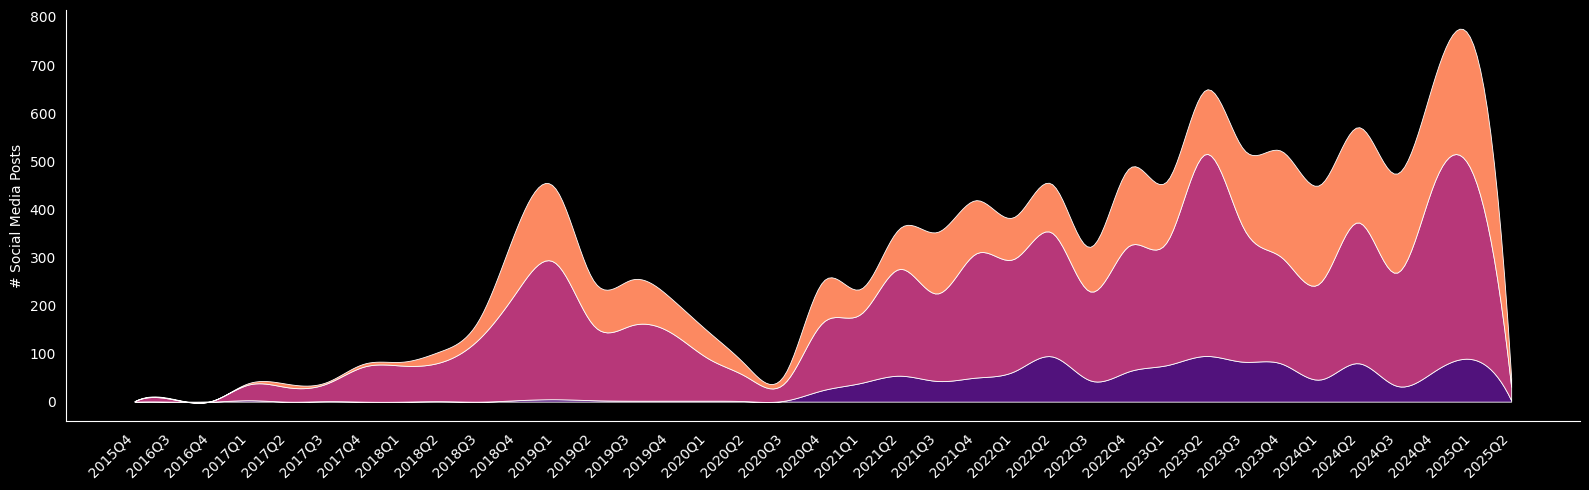

In [ ]:
# ─── 3) STACKED AREA TIMELINE BY QUARTER ──────────────────────────────
df["quarter"] = df["date"].dt.to_period("Q").astype(str)

pivot = (
    df.groupby(["quarter","sentiment"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=sentiments)            # enforce order
)

# sort quarters
pivot.index = pd.to_datetime(pivot.index.str.replace(" Q","-Q"))
pivot = pivot.sort_index()
pivot.index = pivot.index.to_period("Q").astype(str)

x        = np.arange(len(pivot))
x_smooth = np.linspace(x.min(), x.max(), 400)
bottom   = np.zeros_like(x_smooth)

fig, ax = plt.subplots(figsize=(16,5), facecolor="black")
for sent in sentiments:
    y      = pivot[sent].values
    spline = make_interp_spline(x, y, k=3)(x_smooth)
    ax.fill_between(
        x_smooth,
        bottom,
        bottom + spline,
        color=color_map[sent],
        edgecolor="white",
        linewidth=0.6,
        alpha=1
    )
    bottom += spline

# styling
ax.set_facecolor("black")
fig.patch.set_facecolor("black")
for sp in ["top","right"]:
    ax.spines[sp].set_visible(False)
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.tick_params(colors="white")

ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=45, ha="right", color="white")
ax.set_ylabel("# Social Media Posts", color="white")

plt.tight_layout()
plt.show()


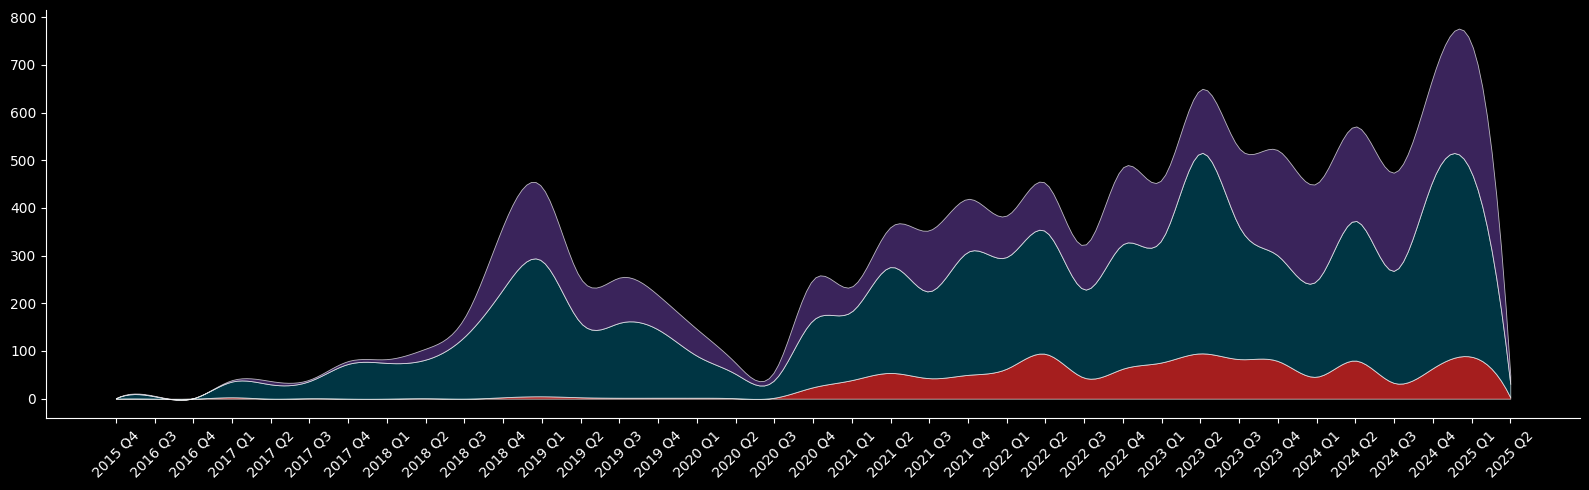

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Step 1: Create new X-axis as numeric (quarters as positions)
x = np.arange(len(pivot_df))
x_smooth = np.linspace(x.min(), x.max(), 300)  # more points for smoothness

# Step 2: Prepare figure
plt.figure(figsize=(16, 5))

# Step 3: Reuse the same colors
colors = {
    "negative": "#ec2b2bff",
    "neutral": "#004d61ff",
    "positive": "#533483"
}

# Step 4: Stack smoothed areas
bottom = np.zeros_like(x_smooth)

for sentiment in pivot_df.columns:
    y = pivot_df[sentiment].values
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    plt.fill_between(
        x_smooth,
        bottom,
        bottom + y_smooth,
        color=colors[sentiment],
        edgecolor='white',
        linewidth=0.6,
        alpha=0.7
    )
    bottom += y_smooth

# Step 5: X-axis labels from original data
quarter_labels = pivot_df.index
tick_positions = np.linspace(0, len(x) - 1, len(quarter_labels))

plt.xticks(ticks=tick_positions, labels=quarter_labels, rotation=45, color='white')
plt.yticks(color='white')

# Style
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(colors='white')
plt.grid(False)

# Background
plt.gcf().patch.set_facecolor('black')
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.title('', fontsize=1)
plt.show()


#---

## TOPIC

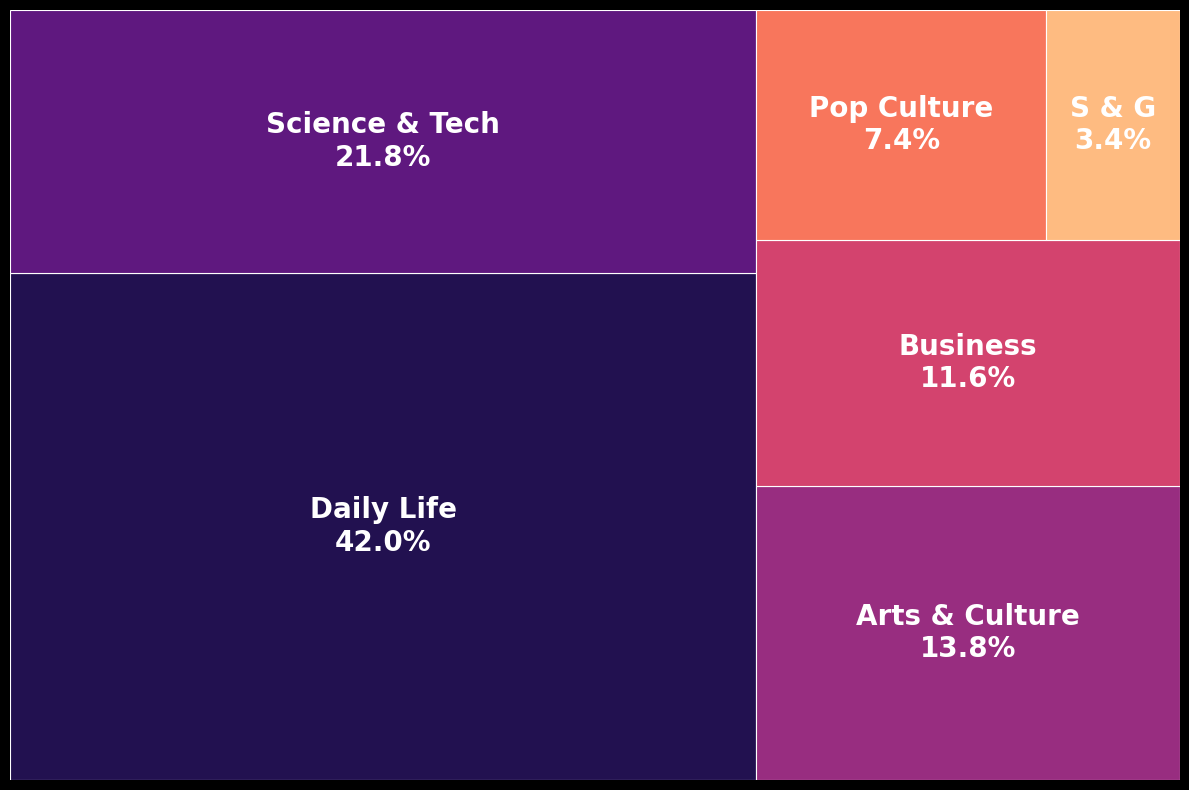

In [ ]:
# Load your data
df = pd.read_csv("sewclean.csv")

## Count and calculate percentages
topic_counts = df['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'count']
topic_counts['percentage'] = 100 * topic_counts['count'] / topic_counts['count'].sum()

# Rename topics for better readability
topic_counts['topic'] = topic_counts['topic'].replace({
    'sports_&_gaming': 'S & G',
    'daily_life': 'Daily Life',
    'science_&_technology': 'Science & Tech',
    'arts_&_culture': 'Arts & Culture',
    'pop_culture': 'Pop Culture',
    'business_&_entrepreneurs': 'Business'
})

# Label with name and percentage
topic_counts['label'] = topic_counts.apply(
    lambda row: f"{row['topic']}\n{row['percentage']:.1f}%", axis=1
)

# Colors from magma palette
colors = sns.color_palette("magma", n_colors=len(topic_counts))

# Plot
plt.figure(figsize=(12, 8), facecolor='black')
squarify.plot(
    sizes=topic_counts['count'],
    label=topic_counts['label'],
    color=colors,
    alpha=1,
    edgecolor='white',
    linewidth=0.8,
    text_kwargs={'fontsize': 20, 'color': 'white', 'weight': 'bold'}
)

plt.axis('off')
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()


<ipython-input-36-71a60b88ef6d>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot_topic.index = pd.to_datetime(pivot_topic.index.str.replace(" Q","-Q"))


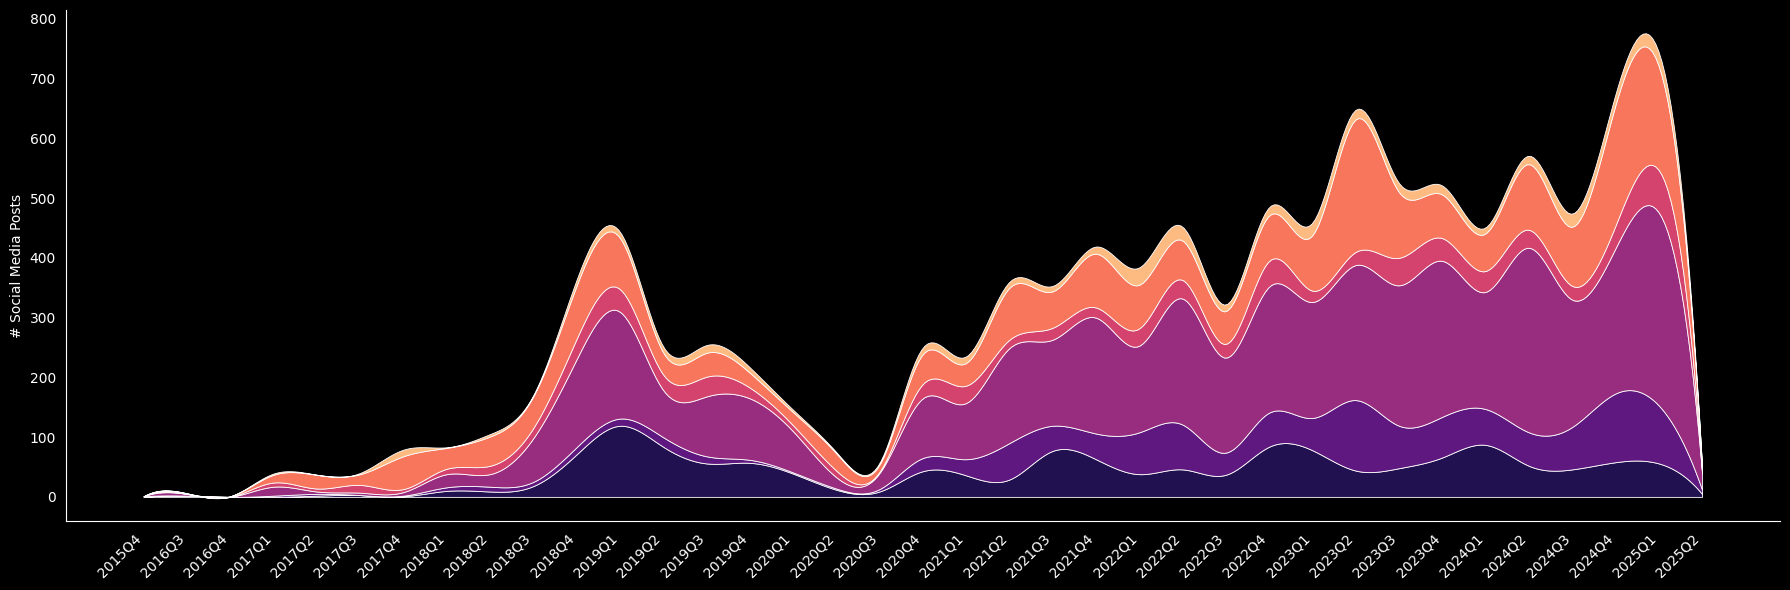

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Load and prepare
df = pd.read_csv("sewclean.csv")
topic_trend = (
    df.groupby(['quarter','topic'])
      .size()
      .reset_index(name='count')
)

# Pivot to wide
pivot_topic = (
    topic_trend
      .pivot(index='quarter', columns='topic', values='count')
      .fillna(0)
)

# Sort & reformat quarter index
pivot_topic.index = pd.to_datetime(pivot_topic.index.str.replace(" Q","-Q"))
pivot_topic = pivot_topic.sort_index()
pivot_topic.index = pivot_topic.index.to_period("Q").astype(str)

# Colors
colors = sns.color_palette("magma", n_colors=len(pivot_topic.columns))

# Prepare smoothing
x        = np.arange(len(pivot_topic))
x_smooth = np.linspace(x.min(), x.max(), 500)
cumulative = np.zeros_like(x_smooth)

# Plot
fig, ax = plt.subplots(figsize=(18, 6), facecolor='black')
for i, col in enumerate(pivot_topic.columns):
    y_smooth = make_interp_spline(x, pivot_topic[col].values)(x_smooth)
    ax.fill_between(
        x_smooth,
        cumulative,
        cumulative + y_smooth,
        color=colors[i],
        edgecolor='white',
        linewidth=0.6,
        alpha=1
    )
    cumulative += y_smooth

# Final styling
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
for side in ['top','right']:
    ax.spines[side].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')

# ← SHOW *ALL* QUARTERS
ax.set_xticks(x)
ax.set_xticklabels(
    pivot_topic.index,
    rotation=45,
    ha='right',
    color='white'
)

# ← ADD Y-AXIS TITLE
ax.set_ylabel("# Social Media Posts", color='white')

plt.tight_layout()
plt.show()


END TOPIC


In [ ]:
!pip install squarify matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns


In [ ]:
# Set fallback font (Helvetica instead of Helvetica Neue)
plt.rcParams['font.family'] = 'Helvetica'

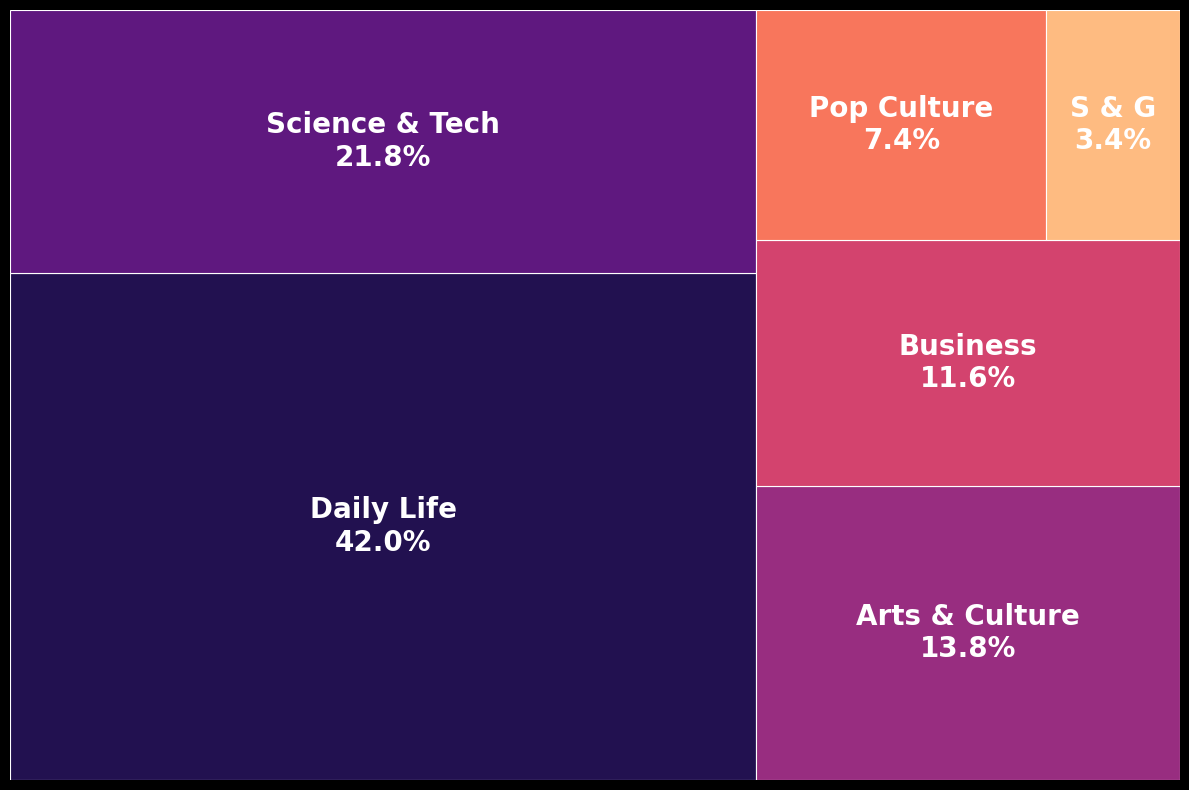

In [ ]:
# Load your data
df = pd.read_csv("sewfinal.csv")

## Count and calculate percentages
topic_counts = df['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'count']
topic_counts['percentage'] = 100 * topic_counts['count'] / topic_counts['count'].sum()

# Rename topics for better readability
topic_counts['topic'] = topic_counts['topic'].replace({
    'sports_&_gaming': 'S & G',
    'daily_life': 'Daily Life',
    'science_&_technology': 'Science & Tech',
    'arts_&_culture': 'Arts & Culture',
    'pop_culture': 'Pop Culture',
    'business_&_entrepreneurs': 'Business'
})

# Label with name and percentage
topic_counts['label'] = topic_counts.apply(
    lambda row: f"{row['topic']}\n{row['percentage']:.1f}%", axis=1
)

# Colors from magma palette
colors = sns.color_palette("magma", n_colors=len(topic_counts))

# Plot
plt.figure(figsize=(12, 8), facecolor='black')
squarify.plot(
    sizes=topic_counts['count'],
    label=topic_counts['label'],
    color=colors,
    alpha=1,
    edgecolor='white',
    linewidth=0.8,
    text_kwargs={'fontsize': 20, 'color': 'white', 'weight': 'bold'}
)

plt.axis('off')
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()

<ipython-input-21-e5d0a15a83f4>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot_topic.index = pd.to_datetime(pivot_topic.index.str.replace(" Q", "-Q"))
<ipython-input-21-e5d0a15a83f4>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), color='white')


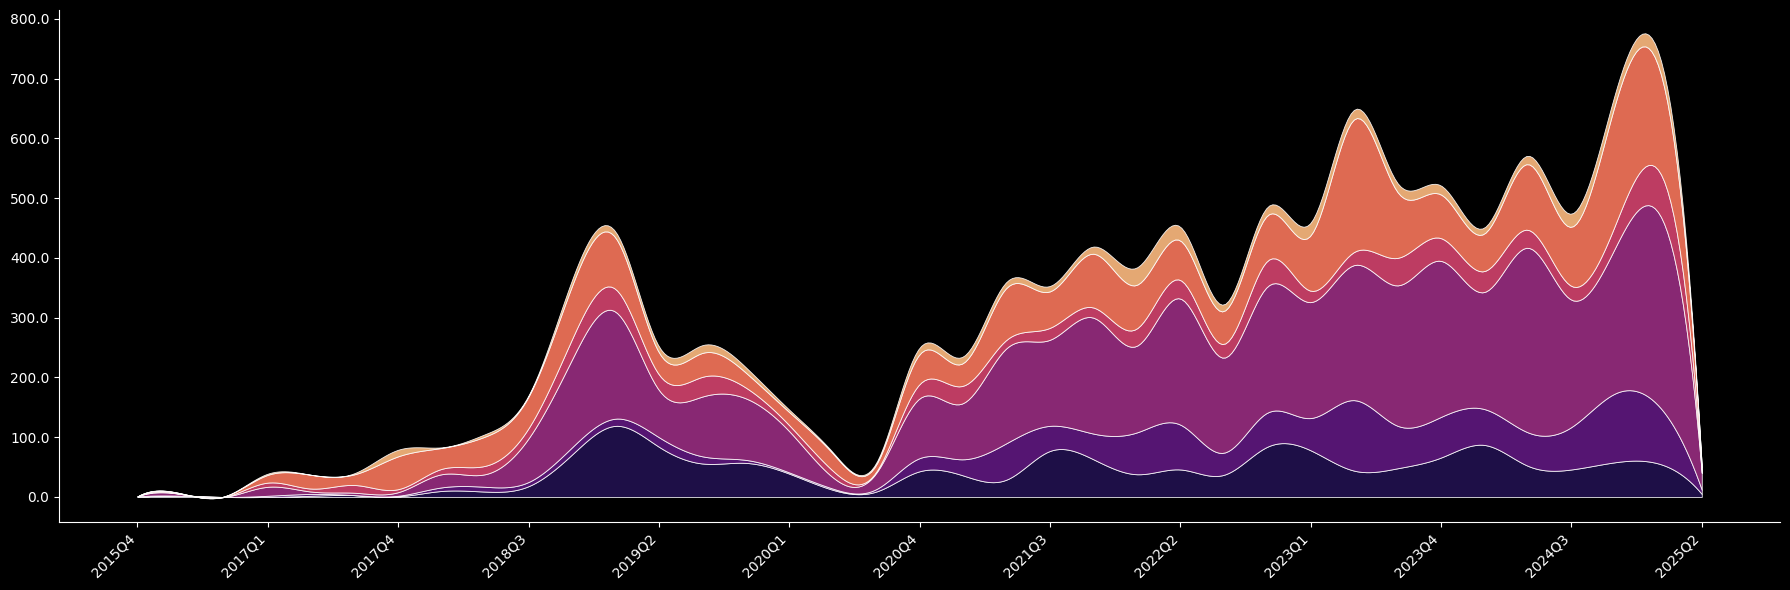

In [ ]:
# Load your file
df = pd.read_csv("sewfinal.csv")

# Group by quarter and topic
topic_trend = df.groupby(['quarter', 'topic']).size().reset_index(name='count')

# Pivot to wide format
pivot_topic = topic_trend.pivot(index='quarter', columns='topic', values='count').fillna(0)

# Sort and format quarters
pivot_topic.index = pd.to_datetime(pivot_topic.index.str.replace(" Q", "-Q"))
pivot_topic = pivot_topic.sort_index()
pivot_topic.index = pivot_topic.index.to_period("Q").astype(str)

# Define color palette
colors = sns.color_palette("magma", n_colors=len(pivot_topic.columns))

# Prepare for smooth plotting
x = np.arange(len(pivot_topic.index))
x_smooth = np.linspace(x.min(), x.max(), 500)
cumulative = np.zeros_like(x_smooth)

# Create the plot
fig, ax = plt.subplots(figsize=(18, 6), facecolor='black')
for i, column in enumerate(pivot_topic.columns):
    y = pivot_topic[column].values
    y_smooth = make_interp_spline(x, y)(x_smooth)
    ax.fill_between(x_smooth, cumulative, cumulative + y_smooth,
                    color=colors[i], edgecolor='white', linewidth=0.6, alpha=0.7)
    cumulative += y_smooth

# Final styling
ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white')
ax.set_xticks(x[::3])
ax.set_xticklabels(pivot_topic.index[::3], rotation=45, ha='right', color='white')
ax.set_yticklabels(ax.get_yticks(), color='white')
plt.tight_layout()
plt.show()

<ipython-input-22-0d7f6031648a>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot_topic.index = pd.to_datetime(pivot_topic.index.str.replace(" Q", "-Q"))
<ipython-input-22-0d7f6031648a>:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), color='white')


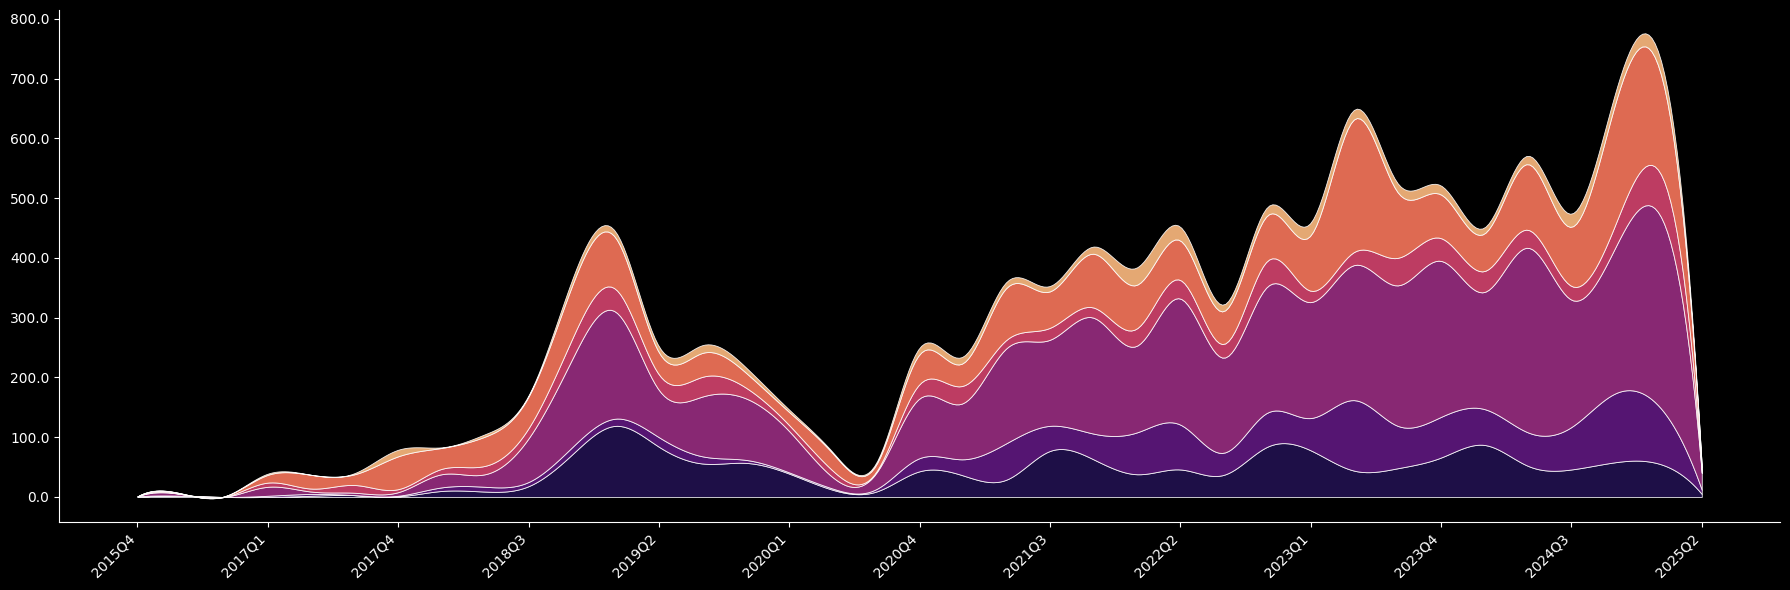

In [ ]:
# 3. Clean topic & quarter data
df = df[df['topic'].notna() & df['quarter'].notna()]

# 4. Define consistent topic colors using magma
unique_topics = sorted(df['topic'].unique())
topic_colors = dict(zip(unique_topics, sns.color_palette("magma", n_colors=len(unique_topics))))

# 5. Aggregate by quarter and topic
topic_trend = df.groupby(['quarter', 'topic']).size().reset_index(name='count')

# 6. Pivot to wide format for stacking
pivot_topic = topic_trend.pivot(index='quarter', columns='topic', values='count').fillna(0)

# 7. Sort by date
pivot_topic.index = pd.to_datetime(pivot_topic.index.str.replace(" Q", "-Q"))
pivot_topic = pivot_topic.sort_index()
pivot_topic.index = pivot_topic.index.to_period("Q").astype(str)

# 8. Interpolate and plot
x = np.arange(len(pivot_topic.index))
x_smooth = np.linspace(x.min(), x.max(), 500)
cumulative = np.zeros_like(x_smooth)

fig, ax = plt.subplots(figsize=(18, 6), facecolor='black')

for topic in pivot_topic.columns:
    y = pivot_topic[topic].values
    y_smooth = make_interp_spline(x, y)(x_smooth)
    ax.fill_between(x_smooth,
                    cumulative,
                    cumulative + y_smooth,
                    color=topic_colors[topic],
                    edgecolor='white',
                    linewidth=0.6,
                    alpha=0.9)
    cumulative += y_smooth

# 9. Final visual tweaks
ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white')
ax.set_xticks(x[::3])
ax.set_xticklabels(pivot_topic.index[::3], rotation=45, ha='right', color='white')
ax.set_yticklabels(ax.get_yticks(), color='white')
plt.tight_layout()
plt.show()

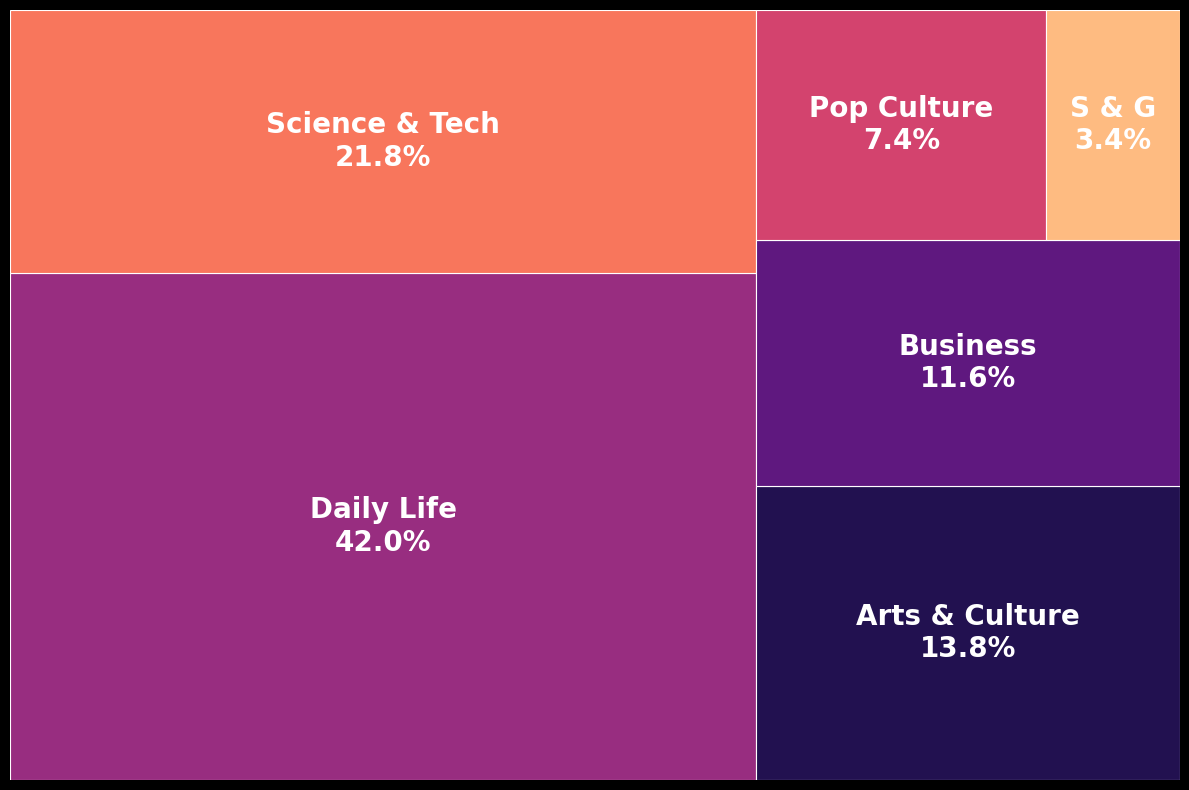

In [ ]:
## Count and calculate percentages
topic_counts = df['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'count']
topic_counts['percentage'] = 100 * topic_counts['count'] / topic_counts['count'].sum()

# Rename topics for better readability (important: do this *after* mapping colors)
topic_counts['topic'] = topic_counts['topic'].replace({
    'sports_&_gaming': 'S & G',
    'daily_life': 'Daily Life',
    'science_&_technology': 'Science & Tech',
    'arts_&_culture': 'Arts & Culture',
    'pop_culture': 'Pop Culture',
    'business_&_entrepreneurs': 'Business'
})

# Label with name and percentage
topic_counts['label'] = topic_counts.apply(
    lambda row: f"{row['topic']}\n{row['percentage']:.1f}%", axis=1
)

# Sync colors using the same topic_colors from the timeline chart
# (Match original labels before they were renamed)
raw_to_display = {
    'sports_&_gaming': 'S & G',
    'daily_life': 'Daily Life',
    'science_&_technology': 'Science & Tech',
    'arts_&_culture': 'Arts & Culture',
    'pop_culture': 'Pop Culture',
    'business_&_entrepreneurs': 'Business'
}
# Reverse mapping: display → raw
display_to_raw = {v: k for k, v in raw_to_display.items()}

# Map colors based on the original topic name
topic_counts['color'] = topic_counts['topic'].map(
    lambda label: topic_colors.get(display_to_raw.get(label, label))
)

# Plot
plt.figure(figsize=(12, 8), facecolor='black')
squarify.plot(
    sizes=topic_counts['count'],
    label=topic_counts['label'],
    color=topic_counts['color'],
    alpha=1,
    edgecolor='white',
    linewidth=0.8,
    text_kwargs={'fontsize': 20, 'color': 'white', 'weight': 'bold'}
)

plt.axis('off')
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()

## Emotions

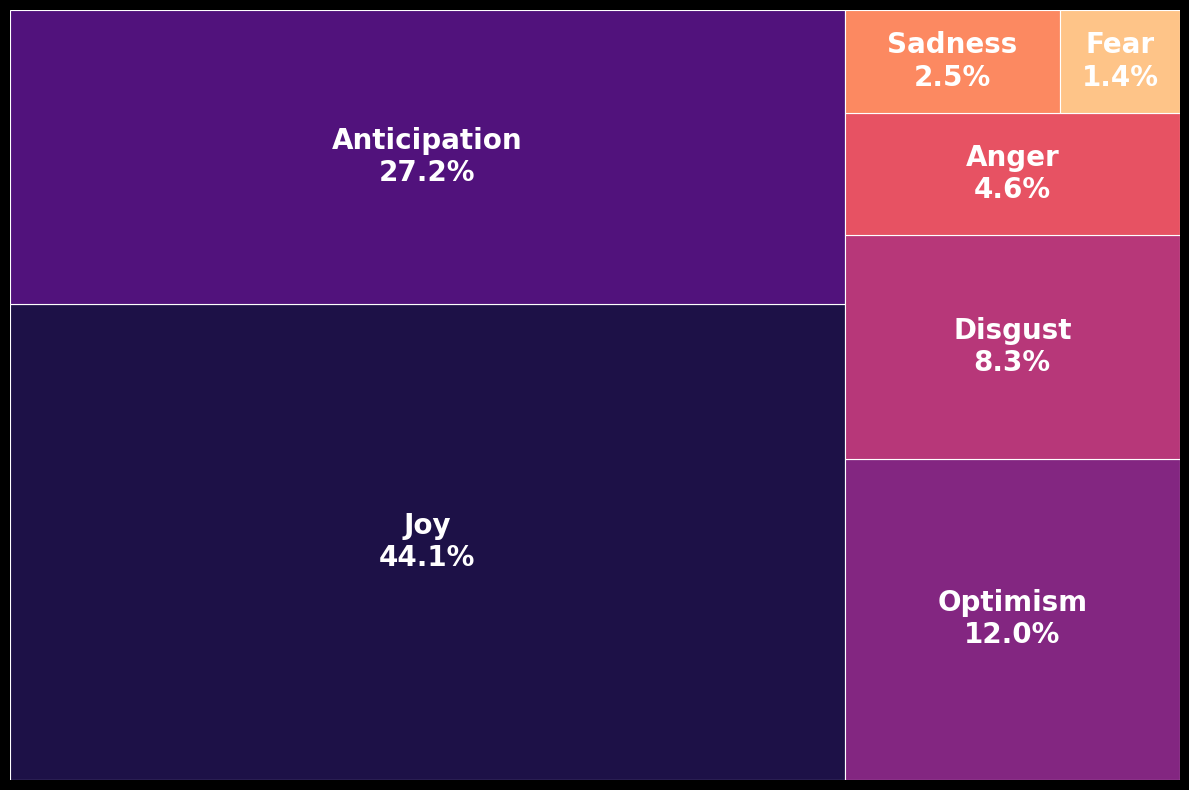

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex

# 1) Load & filter
df = pd.read_csv("sewclean.csv")
df = df[df['emotion'].notna() & (df['emotion'] != 'surprise')].copy()
df['emotion'] = df['emotion'].str.capitalize()

# 2) Count & percent
emotion_counts = (
    df['emotion']
      .value_counts()
      .reset_index(name='count')
      .rename(columns={'index':'emotion'})
)
emotion_counts['pct'] = 100 * emotion_counts['count'] / emotion_counts['count'].sum()

# 3) Build magma → hex
palette = sns.color_palette("magma", n_colors=len(emotion_counts))
colors  = [to_hex(c) for c in palette]

# 4) Labels = Emotion + pct
labels = [
    f"{row.emotion}\n{row.pct:.1f}%"
    for row in emotion_counts.itertuples()
]
sizes = emotion_counts['count'].tolist()

# 5) Plot
plt.figure(figsize=(12,8), facecolor='black')
squarify.plot(
    sizes     = sizes,
    label     = labels,
    color     = colors,
    alpha     = 1,
    edgecolor = "white",
    linewidth = 0.8,
    text_kwargs={
        'fontsize': 20,
        'color': 'white',
        'weight': 'bold'
    }
)
plt.axis('off')
plt.tight_layout()
plt.show()


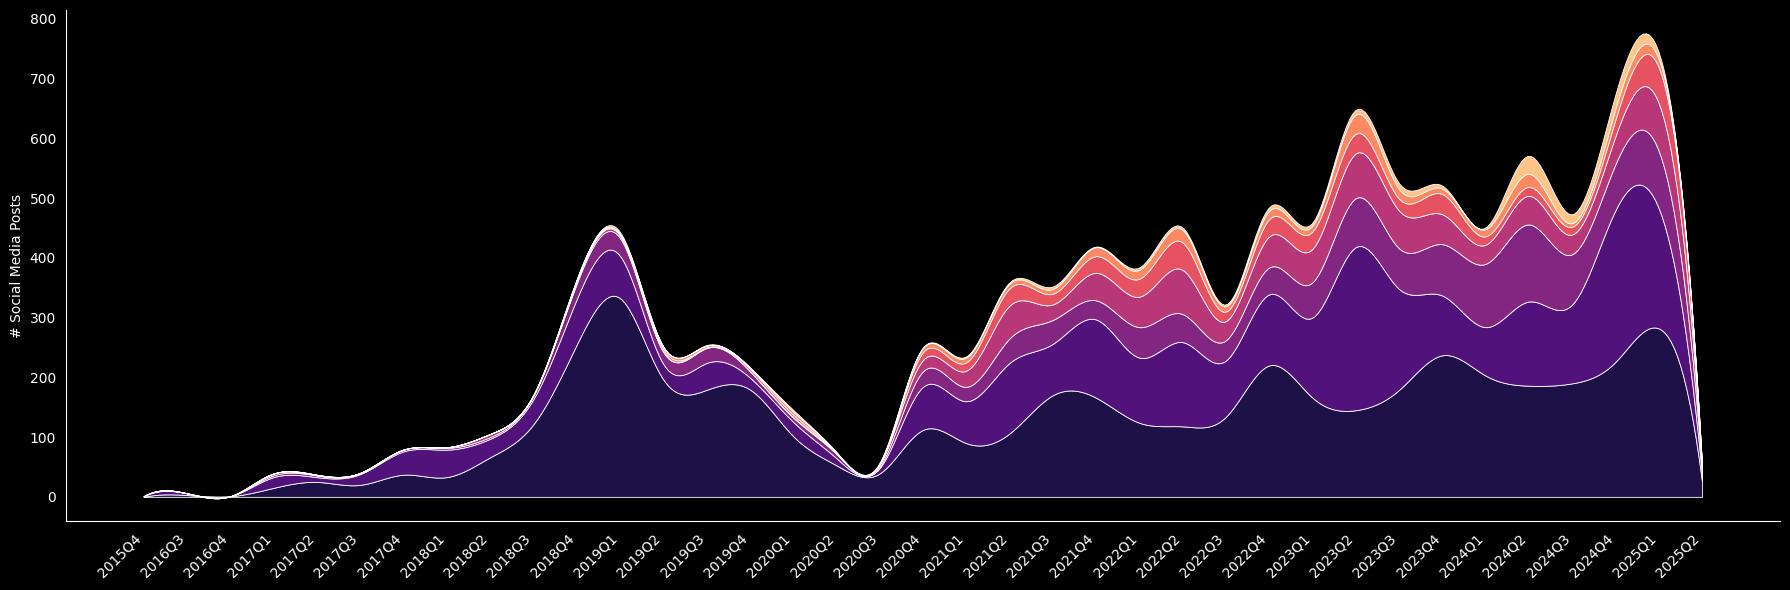

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.colors import to_hex

# 1) Start from the same filtered df you used in the treemap:
df_clean = pd.read_csv("sewclean.csv", parse_dates=["date"])
df_clean = df_clean[df_clean['emotion'].notna() & (df_clean['emotion'].str.lower()!="surprise")].copy()
df_clean['emotion'] = df_clean['emotion'].str.capitalize()

# 2) Recompute emotion_counts *in the same way* so we preserve the exact order:
emotion_counts = (
    df_clean['emotion']
      .value_counts()
      .reset_index(name='count')
      .rename(columns={'index':'emotion'})
)
emotions = emotion_counts['emotion'].tolist()

# 3) Build magma → hex palette in that exact order:
palette = sns.color_palette("magma", n_colors=len(emotions))
hex_colors = [ to_hex(c) for c in palette ]
emotion_colors = dict(zip(emotions, hex_colors))

# 4) Aggregate by quarter & emotion
df_clean['quarter'] = df_clean['date'].dt.to_period('Q').astype(str)
quarterly = (
    df_clean
      .groupby(['quarter','emotion'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=emotions)   # CRITICAL: this forces columns into our treemap order
      .sort_index()
)

# 5) Prepare smoothing
x        = np.arange(len(quarterly))
x_smooth = np.linspace(x.min(), x.max(), 500)
bottom   = np.zeros_like(x_smooth)

# 6) Plot
fig, ax = plt.subplots(figsize=(18,6), facecolor='black')
for emo in emotions:
    y_smooth = make_interp_spline(x, quarterly[emo].values)(x_smooth)
    ax.fill_between(
        x_smooth,
        bottom,
        bottom + y_smooth,
        color=emotion_colors[emo],
        edgecolor='white',
        linewidth=0.6,
        alpha=1
    )
    bottom += y_smooth

# 7) Final styling and labels
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
for sp in ['top','right']:
    ax.spines[sp].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_xticks(x)
ax.set_xticklabels(quarterly.index, rotation=45, ha='right', color='white')
ax.set_ylabel("# Social Media Posts", color='white')
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()


##Final Time Lines





<ipython-input-30-f317d34bb5ab>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot_emotion.index = pd.to_datetime(pivot_emotion.index.str.replace(" Q", "-Q"))
<ipython-input-30-f317d34bb5ab>:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), color='white')


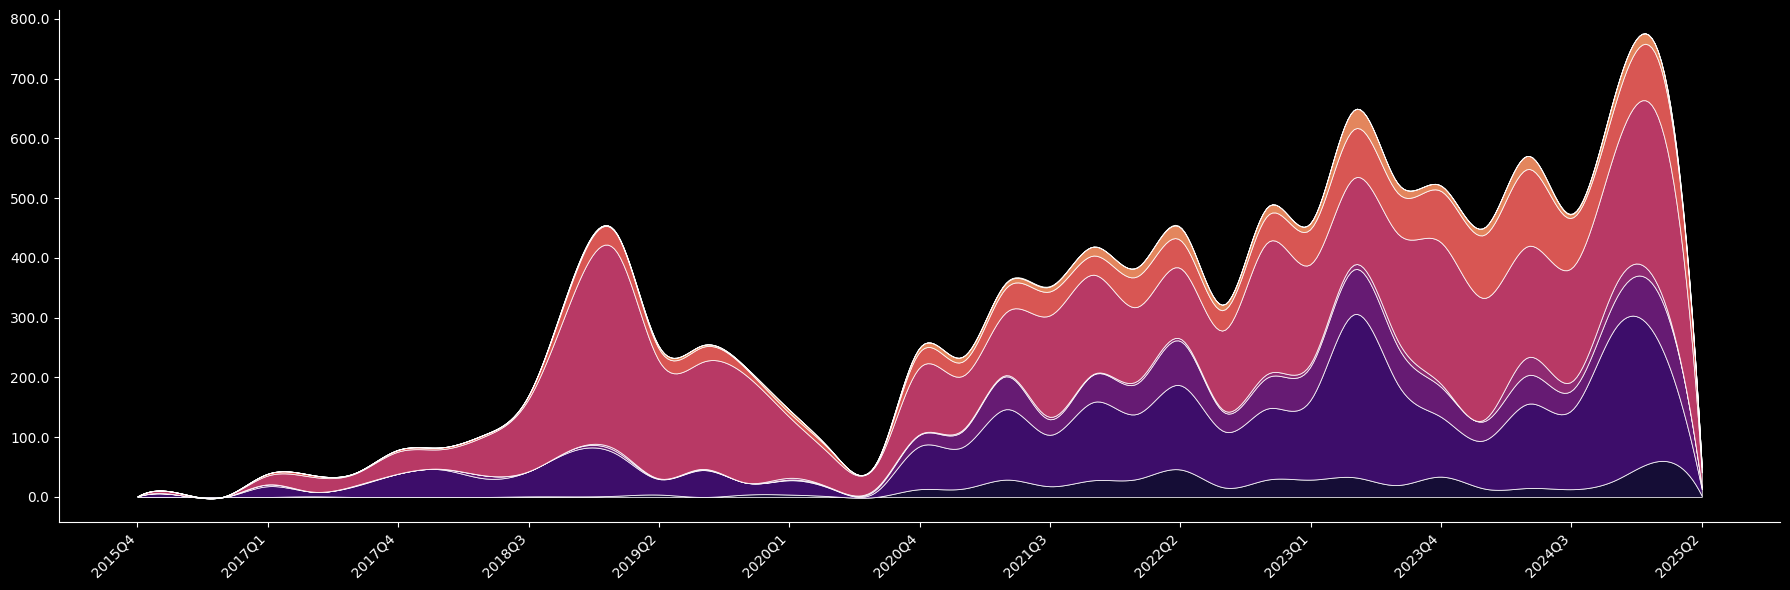

In [ ]:
# 1. Clean data: remove rows with missing 'emotion' or 'quarter'
df = df[df['emotion'].notna() & df['quarter'].notna()]

# 2. Define consistent emotion colors using magma
unique_emotions = sorted(df['emotion'].unique())
emotion_colors = dict(zip(unique_emotions, sns.color_palette("magma", n_colors=len(unique_emotions))))

# 3. Aggregate by quarter and emotion
emotion_trend = df.groupby(['quarter', 'emotion']).size().reset_index(name='count')

# 4. Pivot to wide format for stacking
pivot_emotion = emotion_trend.pivot(index='quarter', columns='emotion', values='count').fillna(0)

# 5. Sort by quarter
pivot_emotion.index = pd.to_datetime(pivot_emotion.index.str.replace(" Q", "-Q"))
pivot_emotion = pivot_emotion.sort_index()
pivot_emotion.index = pivot_emotion.index.to_period("Q").astype(str)

# 6. Interpolate and plot with smooth lines
x = np.arange(len(pivot_emotion.index))
x_smooth = np.linspace(x.min(), x.max(), 500)
cumulative = np.zeros_like(x_smooth)

fig, ax = plt.subplots(figsize=(18, 6), facecolor='black')

for emotion in pivot_emotion.columns:
    y = pivot_emotion[emotion].values
    y_smooth = make_interp_spline(x, y)(x_smooth)
    ax.fill_between(x_smooth,
                    cumulative,
                    cumulative + y_smooth,
                    color=emotion_colors[emotion],
                    edgecolor='white',
                    linewidth=0.6,
                    alpha=0.9)
    cumulative += y_smooth

# 7. Aesthetic adjustments
ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white')
ax.set_xticks(x[::3])
ax.set_xticklabels(pivot_emotion.index[::3], rotation=45, ha='right', color='white')
ax.set_yticklabels(ax.get_yticks(), color='white')
plt.tight_layout()
plt.show()


In [ ]:
df['emotion'].value_counts()


emotion
joy             4737
anticipation    2925
optimism        1286
disgust          894
anger            489
sadness          264
fear             147
surprise           4
Name: count, dtype: int64

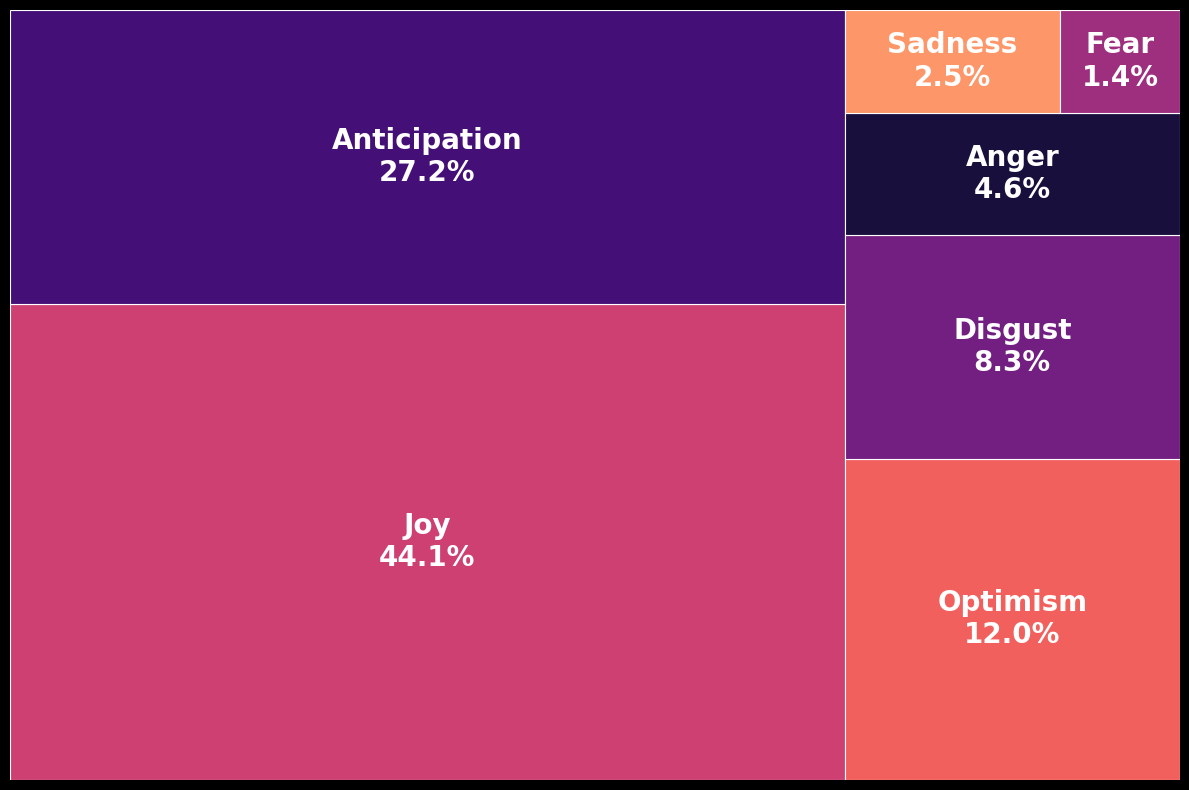

In [ ]:
import squarify

# 1. Filter out 'surprise'
emotion_filtered = df[df['emotion'] != 'surprise']

# 2. Count and calculate percentages
emotion_counts = emotion_filtered['emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'count']
emotion_counts['percentage'] = 100 * emotion_counts['count'] / emotion_counts['count'].sum()

# 3. Capitalize emotion names for display
emotion_counts['emotion'] = emotion_counts['emotion'].str.capitalize()

# 4. Map original lowercase emotions to colors from timeline
# Re-create this mapping using the same `emotion_colors` as before
emotion_colors_cap = {k.capitalize(): v for k, v in emotion_colors.items()}
emotion_counts['color'] = emotion_counts['emotion'].map(emotion_colors_cap)

# 5. Create label with emotion and percentage
emotion_counts['label'] = emotion_counts.apply(
    lambda row: f"{row['emotion']}\n{row['percentage']:.1f}%", axis=1
)

# 6. Plot the treemap
plt.figure(figsize=(12, 8), facecolor='black')
squarify.plot(
    sizes=emotion_counts['count'],
    label=emotion_counts['label'],
    color=emotion_counts['color'],
    alpha=1,
    edgecolor='white',
    linewidth=0.8,
    text_kwargs={'fontsize': 20, 'color': 'white', 'weight': 'bold'}
)

plt.axis('off')
plt.gca().set_facecolor('black')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

# 1. Load the data
df = pd.read_csv("sewfinal.csv")

# 2. Clean and rename labels
df = df[df['sentiment'].notna() & df['topic'].notna() & df['emotion'].notna()]
df['sentiment'] = df['sentiment'].str.capitalize()
df['emotion'] = df['emotion'].str.capitalize()
df['topic'] = df['topic'].replace({
    'sports_&_gaming': 'S & G',
    'daily_life': 'Daily Life',
    'science_&_technology': 'Science & Tech',
    'arts_&_culture': 'Arts & Culture',
    'pop_culture': 'Pop Culture',
    'business_&_entrepreneurs': 'Business'
})

# 3. Create links between sentiment → topic and topic → emotion
links_1 = df.groupby(['sentiment', 'topic']).size().reset_index(name='value')
links_2 = df.groupby(['topic', 'emotion']).size().reset_index(name='value')
links_1.columns = ['source', 'target', 'value']
links_2.columns = ['source', 'target', 'value']
links = pd.concat([links_1, links_2], ignore_index=True)

# 4. Get all unique node labels
nodes = pd.Series(pd.concat([links['source'], links['target']])).unique()
node_indices = {label: i for i, label in enumerate(nodes)}

# 5. Map source/target to node indices
links['source'] = links['source'].map(node_indices)
links['target'] = links['target'].map(node_indices)

# 6. Generate magma colors for nodes with 75% opacity
palette = sns.color_palette("magma", n_colors=len(nodes))
node_colors = [f'rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 0.75)' for r, g, b in palette]

# 7. Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=60,
        line=dict(color="white", width=1),
        label=nodes,
        color=node_colors,
        hoverlabel=dict(font=dict(family='Helvetica', size=14, color='white'))
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value'],
        color='rgba(255,255,255,0.2)'  # subtle white links
    )
)])

# 8. Style layout
fig.update_layout(
    font=dict(family="Helvetica", color="white", size=18),
    plot_bgcolor='black',
    paper_bgcolor='black',
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()


In [ ]:
# Step-by-step: Embedding-based 2D scatter (UMAP) in Colab

# 1. Install required libraries
!pip install -q sentence-transformers umap-learn plotly

# 2. Imports
import pandas as pd
from sentence_transformers import SentenceTransformer
import umap
import seaborn as sns
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "colab"

# 3. Load your dataset
df = pd.read_csv("sewfinal.csv")

# 4. (Optional) Sample for speed
# df = df.sample(n=5000, random_state=42)

# 5. Compute embeddings with a lightweight SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
texts = df['content_en'].astype(str).tolist()   # use your text column
embeddings = model.encode(texts, show_progress_bar=True)

# 6. Reduce to 2D with UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
coords = reducer.fit_transform(embeddings)
df['x'] = coords[:, 0]
df['y'] = coords[:, 1]

# 7. Prepare color & symbol mappings
topics = df['topic'].unique().tolist()
# magma palette for topics
palette = sns.color_palette("magma", n_colors=len(topics))
hex_colors = [mcolors.to_hex(c) for c in palette]
color_map = dict(zip(topics, hex_colors))

# symbol map for sentiment
symbol_map = {
    'Neutral': 'circle',
    'Positive': 'diamond',
    'Negative': 'x'
}

# 8. Plot interactive scatter
fig = px.scatter(
    df, x='x', y='y',
    color='topic',
    color_discrete_map=color_map,
    symbol='sentiment',
    symbol_map=symbol_map,
    hover_data=['topic','sentiment','emotion'],
    width=900, height=700,
)

# 9. Style for dark theme
fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.update_layout(
    template='plotly_dark',
    font=dict(family='Helvetica', color='white', size=14),
    legend_title_text='Topic / Sentiment',
    margin=dict(l=0,r=0,t=0,b=0)
)

fig.show(renderer="svg")


Batches:   0%|          | 0/340 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
# 0. Install BERTopic with its visualization dependencies
!pip install -q bertopic[visualization] umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sewclean.csv to sewclean.csv


In [ ]:
# 1. Install BERTopic with visualization dependencies
!pip install -q bertopic[visualization] umap-learn hdbscan

# 2. Imports
import pandas as pd
from bertopic import BERTopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.1 MB/s eta 0:00:00


In [ ]:
# 3. Load your cleaned dataset
df = pd.read_csv("sewclean.csv")

# 4. Convert quarter strings (e.g. "2021 Q2") into real dates at quarter start
def quarter_to_date(q):
    year, qtr = q.split(" Q")
    month = (int(qtr) - 1) * 3 + 1
    return pd.Timestamp(year=int(year), month=month, day=1)

df['quarter_dt'] = df['quarter'].apply(quarter_to_date)

# 5. Instantiate BERTopic **without** probability computation for speed
model = BERTopic(
    top_n_words=4,
    calculate_probabilities=False
)

# 6. Fit the model on all posts’ English text
texts = df['content_en'].astype(str).tolist()
topics, _ = model.fit_transform(texts)

# 7. Compute topic prevalence over time (one bin per quarter)
topics_over_time = model.topics_over_time(
    docs=texts,
    topics=topics,
    timestamps=df['quarter_dt'].tolist(),
    nr_bins=df['quarter_dt'].nunique()
)

# 8. Visualize dynamic topics in a heat-strip and export
fig = model.visualize_topics_over_time(topics_over_time)
fig.write_html("topic_drift_over_time.html")
fig  # renders inline in Colab

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"   # use the Colab renderer

fig = model.visualize_topics_over_time(topics_over_time)
fig.write_html("topic_drift_over_time.html")  # optional export
fig.show()  # this will display it inline


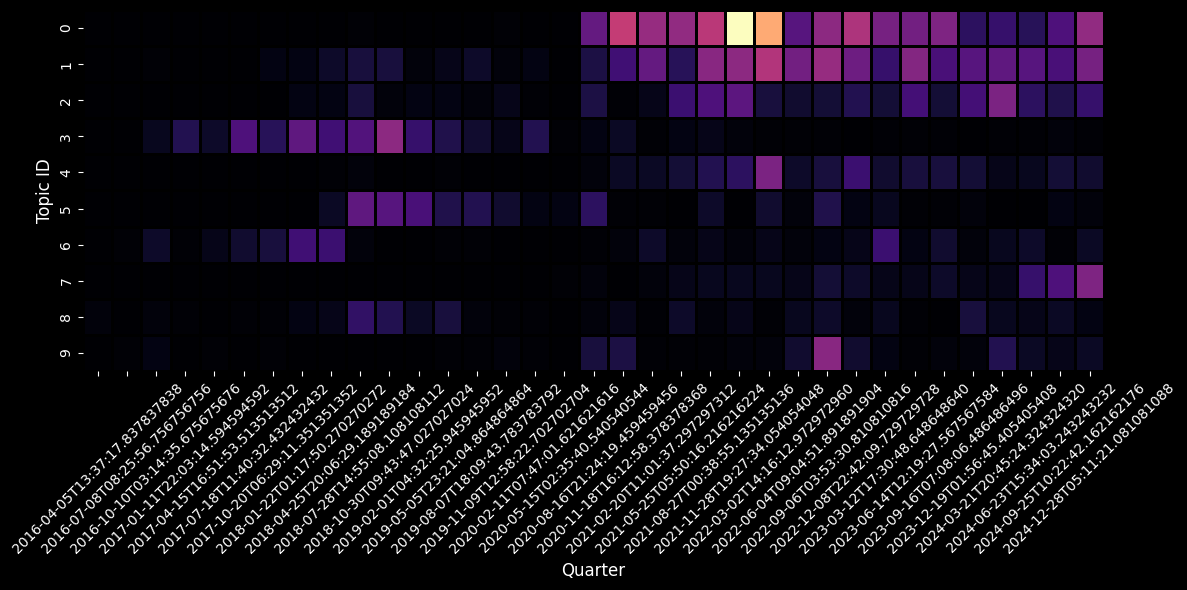

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Assume topics_over_time is already computed from BERTopic
# topics_over_time = model.topics_over_time(...)

# 2. Filter out noise topic -1
df_tot = topics_over_time[topics_over_time['Topic'] >= 0]

# 3. Identify top 10 topics by total frequency
top_topics = (
    df_tot.groupby('Topic')['Frequency']
    .sum()
    .nlargest(10)
    .index
    .tolist()
)

# 4. Subset and pivot for quarters
df_top = df_tot[df_tot['Topic'].isin(top_topics)]
heatmap_data = (
    df_top
    .pivot(index='Topic', columns='Timestamp', values='Frequency')
    .fillna(0)
)

# 5. Reorder rows by overall frequency descending
heatmap_data = heatmap_data.loc[top_topics]

# 6. Plot static heatmap
plt.rcParams['font.family'] = 'Helvetica Neue'
fig, ax = plt.subplots(figsize=(12, 6), facecolor='black')

sns.heatmap(
    heatmap_data,
    ax=ax,
    cmap='magma',
    cbar=False,
    linewidths=1,
    linecolor='black'
)

# 7. Minimalist styling
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

ax.set_xlabel('Quarter', color='white', fontsize=12)
ax.set_ylabel('Topic ID', color='white', fontsize=12)

ax.tick_params(axis='x', colors='white', rotation=45, labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)

# Remove spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


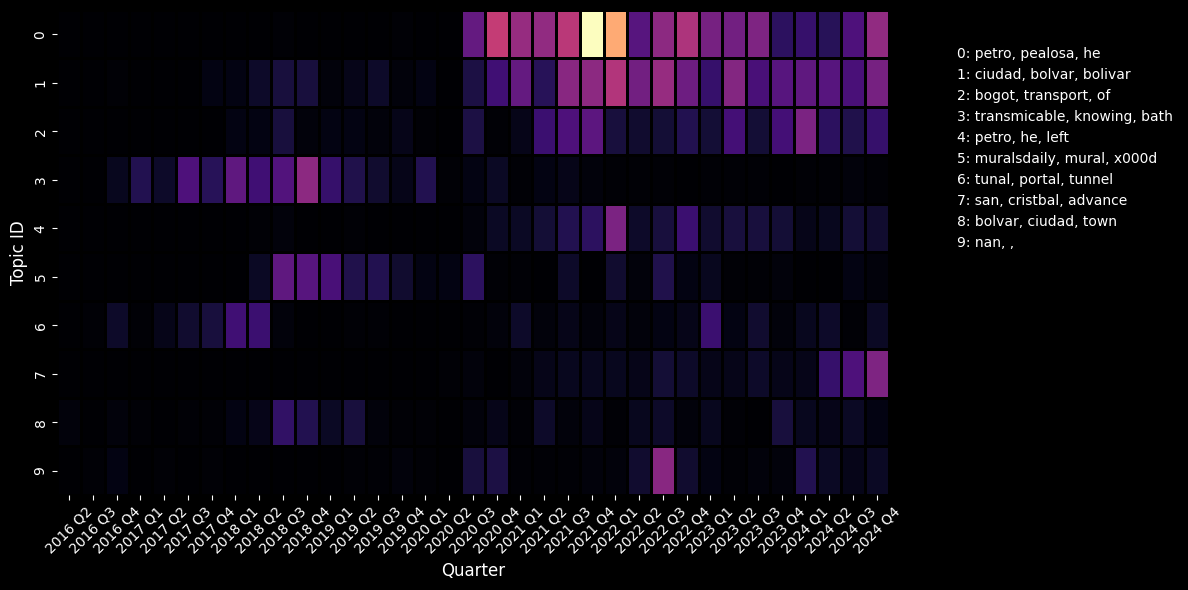

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# ── assume you have already run BERTopic and have `topics_over_time` ──
# topics_over_time.columns might look like ['Topic','Timestamp','Frequency',…]
df_tot = topics_over_time[topics_over_time['Topic'] >= 0]

# 1. Pick your frequency & time cols
freq_col = 'Frequency'
time_col = 'Timestamp'

# 2. Identify top 10 topics by overall frequency
top_topics = (
    df_tot
     .groupby('Topic')[freq_col]
     .sum()
     .nlargest(10)
     .index
     .tolist()
)

# 3. Subset & pivot into a matrix Topic×Timestamp
df_top = df_tot[df_tot['Topic'].isin(top_topics)]
heatmap_data = (
    df_top
     .pivot(index='Topic', columns=time_col, values=freq_col)
     .fillna(0)
)

# 4. Rename columns to simple quarter strings
quarters = [
    f"{ts.to_period('Q').year} Q{ts.to_period('Q').quarter}"
    for ts in heatmap_data.columns
]
heatmap_data.columns = quarters

# 5. Reorder rows to match descending volume
heatmap_data = heatmap_data.loc[top_topics]

# 6. Retrieve top-3 words for each topic for the legend
legend_labels = []
for tid in top_topics:
    # model is your BERTopic instance
    words = [w for w,_ in model.get_topic(tid)[:3]]
    legend_labels.append(f"{tid}: {', '.join(words)}")

# 7. Plot static heatmap
plt.rcParams['font.family'] = 'Helvetica Neue'
fig, ax = plt.subplots(figsize=(12, 6), facecolor='black')

sns.heatmap(
    heatmap_data,
    ax=ax,
    cmap='magma',
    cbar=False,
    linewidths=1,
    linecolor='black'
)

# 8. Minimalist styling
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.set_xlabel('Quarter', color='white', fontsize=12)
ax.set_ylabel('Topic ID', color='white', fontsize=12)
ax.tick_params(axis='x', colors='white', rotation=45, labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)
for spine in ['top','right','left','bottom']:
    ax.spines[spine].set_visible(False)

# 9. Side-legend with topic descriptions
handles = [mpatches.Patch(color='none', label=lbl) for lbl in legend_labels]
ax.legend(
    handles=handles,
    title="Top 10 Topics",
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    frameon=False,
    title_fontsize=12,
    labelcolor='white',
    fontsize=10
)

plt.tight_layout()
plt.show()


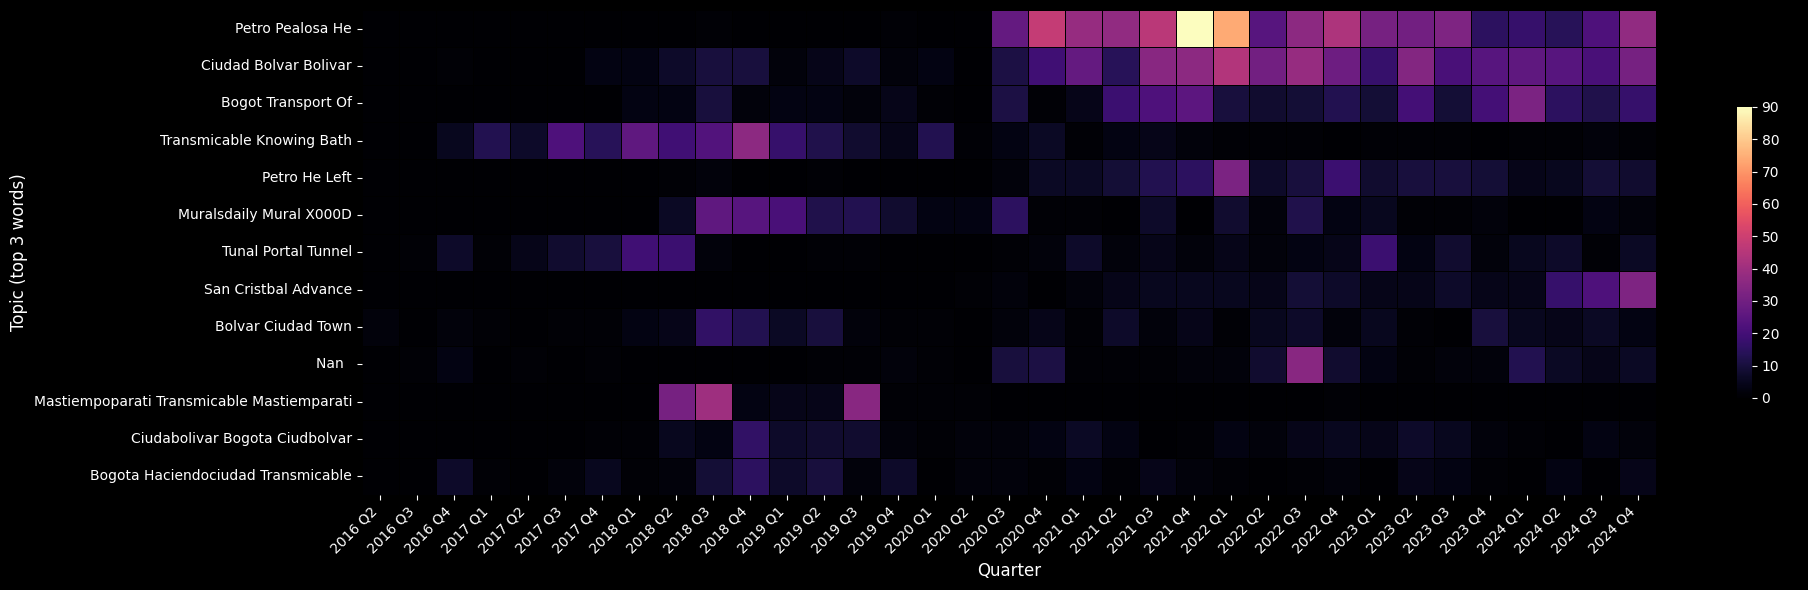

In [ ]:
# 1. Filter out noise topic -1
df_tot = topics_over_time[topics_over_time["Topic"] >= 0]

# 2. Use the correct columns
freq_col = "Frequency"
time_col = "Timestamp"

# 3. Identify the top 10 topics by total frequency
top_topics = (
    df_tot
      .groupby("Topic")[freq_col]
      .sum()
      .nlargest(13)
      .index
      .tolist()
)

# 4. Pivot into a matrix Topic × Timestamp
df_top = df_tot[df_tot["Topic"].isin(top_topics)]
heatmap_data = (
    df_top
      .pivot(index="Topic", columns=time_col, values=freq_col)
      .fillna(0)
)

# 5. Replace numeric IDs with each topic’s top-3 words
display_labels = []
for tid in top_topics:
    top_words = [w for w,_ in model.get_topic(tid)[:3]]
    display_labels.append(" ".join(top_words).title())
heatmap_data.index = display_labels

# 6. Convert Timestamp columns to simple "YYYY Qn" strings
quarters = [
    f"{ts.to_period('Q').year} Q{ts.to_period('Q').quarter}"
    for ts in heatmap_data.columns
]
heatmap_data.columns = quarters

# 7. Plot static heatmap with colorbar
plt.rcParams['font.family'] = 'Helvetica Neue'
fig, ax = plt.subplots(figsize=(20, 6), facecolor='black')

sns.heatmap(
    heatmap_data,
    ax=ax,
    cmap='magma',
    cbar=True,
    cbar_kws={
        'label': 'Document Frequency',
        'orientation': 'vertical',
        'shrink': 0.6
    },
    linewidths=0.5,
    linecolor='black'
)

# 8. Minimalist styling
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

ax.set_xlabel('Quarter', color='white', fontsize=12)
ax.set_ylabel('Topic (top 3 words)', color='white', fontsize=12)

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# X-ticks: rotate & align
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.set_xticklabels(
    heatmap_data.columns,
    rotation=45,
    ha='right',
    color='white',
    fontsize=10
)

# Y-ticks
ax.tick_params(axis='y', colors='white', labelsize=10)

# Style the colorbar text
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.tight_layout()

In [ ]:

# 1. Install dependencies (run once)
!pip install -q pandas plotly

# 2. Imports
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# 3. Load & preprocess data
df = pd.read_csv("sewclean.csv")
df['date'] = pd.to_datetime(df['date'])

# 3a. Map sentiment labels to numeric scores for filtering
sent_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sent_score'] = df['sentiment'].map(sent_map)

# 4. Filter only strongly positive posts
df_pos = df[df['sent_score'] >= 0.5].copy()
# --- After Step 4 (filter positive posts) add: remove Fear ---
df_pos = df_pos[~df_pos['emotion'].str.title().isin(['Fear', 'Anger'])]


# 5. Ensure 'emotion' column exists and is string
df_pos['emotion'] = df_pos['emotion'].astype(str).str.title()  # e.g. 'Joy', 'Trust', ...

# 6. (Revised) Define aspect‐to‐keywords mapping with more specific phrases
aspect_keywords = {
    "Cultural programming": [
    # Performance & event types
    "cine al aire libre", "open-air cinema", "cine al aire",
    "exposición artística", "art exhibit", "art show", "museo móvil",
    "museo", "museo móvil", "gallery", "galería",
    # Community workshops
    "taller de arte", "art workshop", "taller comunitario",
    "clases de pintura", "pintura", "painting class",
    # Festivals & fairs
    "festival cultural", "cultural festival", "feria", "fair",
    "evento cultural", "cultural event"
    ],
    "Time savings": [
        "no traffic",
        "sin trancones",
        "short commute",
        "commute corto",
        "travel time",
        "tiempo de viaje reducido",
        "direct route",
        "ruta directa",
        "fast access",
        "acceso rápido",
        "consistent timing",
        "horarios cumplidos",
        "sin demoras"
    ],
    "Urban furniture": [
        "street furniture",
        "mobiliario urbano",
        "bike parking",
        "parqueaderos bici",
        "public benches",
        "bancos cómodos",
        "waste bins",
        "basureros",
        "lighting",
        "iluminación",
        "signage",
        "señalización",
        "green areas",
        "áreas verdes",
        "green space",
        "canchas",
        "park",
        "parques",
        "bancas"
    ],
     "Sustainability": [
        "eco-friendly", "sostenible", "green corridor", "corredor verde",
        "clean energy", "energía limpia", "renewable", "renovable",
        "sustainable transport", "transporte sostenible", "pollution", "polusion", "trash", "cleanliness"
    ]
}

# 7. Flag each post for each aspect bucket
for aspect, keywords in aspect_keywords.items():
    pattern = "|".join(keywords)
    df_pos[aspect] = df_pos['content_en'].str.contains(pattern, case=False, na=False)

# 8. Build count matrix: aspect buckets × emotions
emotions = df_pos['emotion'].unique().tolist()
matrix = pd.DataFrame(0, index=aspect_keywords.keys(), columns=emotions)

for aspect in aspect_keywords:
    for emo in emotions:
        matrix.at[aspect, emo] = df_pos[
            df_pos[aspect] & (df_pos['emotion'] == emo)
        ].shape[0]


# --- Step 8: build the list of emotions without Fear ---
emotions = df_pos['emotion'].unique().tolist()
# now this will only include Joy, Trust, Anticipation, Optimism, etc.

# 9. Prepare Sankey nodes & links
buckets = list(aspect_keywords.keys())
nodes = buckets + emotions
node_index = {label: i for i, label in enumerate(nodes)}

sources = []
targets = []
values  = []
for aspect in buckets:
    for emo in emotions:
        count = matrix.at[aspect, emo]
        if count > 0:
            sources.append(node_index[aspect])
            targets.append(node_index[emo])
            values.append(count)



In [ ]:
import seaborn as sns
from matplotlib.colors import to_hex

In [ ]:
!pip install plotly

In [ ]:
# 2. Generate a magma palette matching number of nodes
palette = sns.color_palette("magma", n_colors=len(nodes))
node_colors = [to_hex(rgb) for rgb in palette]

# 3. Link colors: derive from source node color with semi‐transparency
# ─── 2) Grayscale link colors proportional to flow size ──────────────────
max_val     = max(values)
link_colors = []
for v in values:
    frac = v / max_val
    # map frac∈[0,1] → gray∈[200↓50] so bigger = darker
    gray = int(200 - 150 * frac)
    link_colors.append(f"rgba({gray},{gray},{gray},0.4)")

# 4. Build the Sankey ONLY (removed mini-bar)
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=60,
        line=dict(color="white", width=1),
        label=nodes,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors  # using the standard link color
    )
)])

# 5. Final styling: black background, white text
fig.update_layout(
    font=dict(family="Helvetica Neue", color="white", size=18),
    paper_bgcolor="black",
    plot_bgcolor="black",
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()

In [ ]:
aspect_keywords = {
    "Cultural programming": [
    # Performance & event types
    "cine al aire libre", "open-air cinema", "cine al aire",
    "exposición artística", "art exhibit", "art show", "museo móvil",
    "museo", "museo móvil", "gallery", "galería",
    # Community workshops
    "taller de arte", "art workshop", "taller comunitario",
    "clases de pintura", "pintura", "painting class",
    # Festivals & fairs
    "festival cultural", "cultural festival", "feria", "fair",
    "evento cultural", "cultural event"
    ],
    "Time savings": [
        "no traffic",
        "sin trancones",
        "short commute",
        "commute corto",
        "travel time",
        "tiempo de viaje reducido",
        "direct route",
        "ruta directa",
        "fast access",
        "acceso rápido",
        "consistent timing",
        "horarios cumplidos",
        "sin demoras"
    ],
    "Urban furniture": [
        "street furniture",
        "mobiliario urbano",
        "bike parking",
        "parqueaderos bici",
        "public benches",
        "bancos cómodos",
        "waste bins",
        "basureros",
        "lighting",
        "iluminación",
        "signage",
        "señalización",
        "green areas",
        "áreas verdes",
        "green space",
        "canchas",
        "park",
        "parques",
        "bancas"
    ],
     "Sustainability": [
        "eco-friendly", "sostenible", "green corridor", "corredor verde",
        "clean energy", "energía limpia", "renewable", "renovable",
        "sustainable transport", "transporte sostenible", "pollution", "polusion", "trash", "cleanliness"
    ],
    "Political discussion": [
        "penalosa", "peñalosa", "petro", "enrique", "ivan",
        "alcalde", "regidor", "político", "política", "elección"
    ],

    "Safety": [
        "seguridad","safe","danger","peligro","accident","accidente"
    ],
    "Accessibility": [
        "accesible","access","ramp","rampla","wheelchair","silla de ruedas"
    ],
    "Comfort": [
        "cómodo","comfortable","comodidad","air conditioning",
        "aire acondicionado","climate control"
    ],
    "Reliability": [
        "puntual","on time","reliable","confiable","downtime",
        "avería","descompuesto"
    ],
    "Cost": [
        "barato","cheap","costo","fare","tarifa","precio"
    ]
}


In [ ]:

# 10. Create subplot with Sankey + mini-bar
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.75, 0.25],
    specs=[[{"type": "sankey"}], [{"type": "bar"}]]
)

# 10a. Sankey diagram
fig.add_trace(
    go.Sankey(
        arrangement="snap",
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="white", width=1),
            label=nodes,
            color=["rgba(100,150,200,0.8)"] * len(nodes)
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color="rgba(200,200,200,0.4)"
        )
    ),
    row=1, col=1
)

# 10b. Mini-bar of total mentions per aspect
fig.add_trace(
    go.Bar(
        x=buckets,
        y=matrix.sum(axis=1).values,
        marker=dict(color="rgba(100,150,200,0.8)"),
        showlegend=False
    ),
    row=2, col=1
)


In [ ]:

# 11. Layout styling
fig.update_layout(
    font=dict(family="Helvetica Neue", color="white", size=12),
    paper_bgcolor="black",
    plot_bgcolor="black",
    margin=dict(l=20, r=20, t=20, b=20)
)

# 11a. Axes styling
fig.update_xaxes(
    tickfont=dict(color="white"),
    row=2, col=1
)
fig.update_yaxes(
    tickfont=dict(color="white"),
    row=2, col=1
)

fig.show()


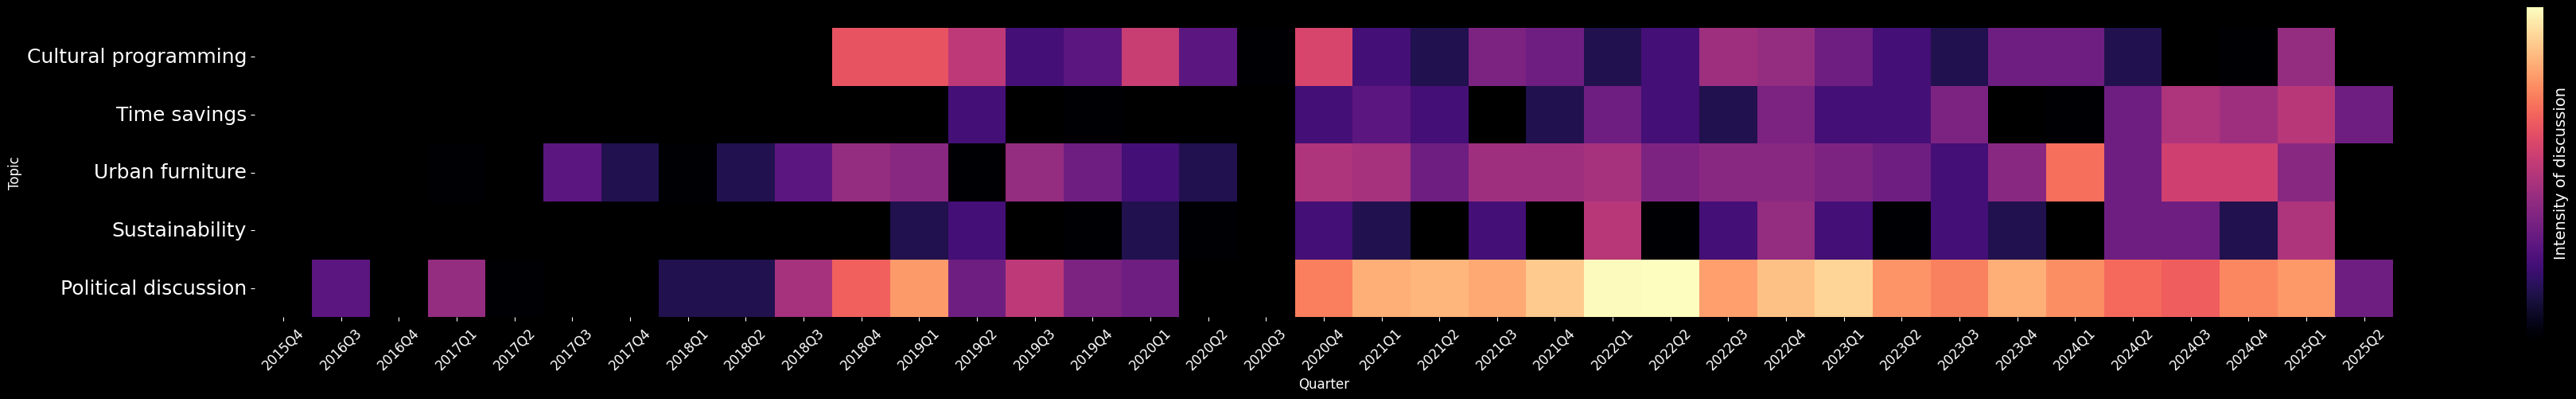

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm   # ← add this


# 1. Load data and compute quarters
df = pd.read_csv("sewclean.csv")
df['date']    = pd.to_datetime(df['date'])
df['quarter'] = df['date'].dt.to_period('Q').astype(str)

# 2. Define aspect→keywords (including Political discussion)
aspect_keywords = {
    "Cultural programming": [
    # Performance & event types
    "cine al aire libre", "open-air cinema", "cine al aire",
    "exposición artística", "art exhibit", "art show", "museo móvil",
    "museo", "museo móvil", "gallery", "galería",
    # Community workshops
    "taller de arte", "art workshop", "taller comunitario",
    "clases de pintura", "pintura", "painting class",
    # Festivals & fairs
    "festival cultural", "cultural festival", "feria", "fair",
    "evento cultural", "cultural event"
    ],
    "Time savings": [
        "no traffic",
        "sin trancones",
        "short commute",
        "commute corto",
        "travel time",
        "tiempo de viaje reducido",
        "direct route",
        "ruta directa",
        "fast access",
        "acceso rápido",
        "consistent timing",
        "horarios cumplidos",
        "sin demoras"
    ],
    "Urban furniture": [
        "street furniture",
        "mobiliario urbano",
        "bike parking",
        "parqueaderos bici",
        "public benches",
        "bancos cómodos",
        "waste bins",
        "basureros",
        "lighting",
        "iluminación",
        "signage",
        "señalización",
        "green areas",
        "áreas verdes",
        "green space",
        "canchas",
        "park",
        "parques",
        "bancas"
    ],
     "Sustainability": [
        "eco-friendly", "sostenible", "green corridor", "corredor verde",
        "clean energy", "energía limpia", "renewable", "renovable",
        "sustainable transport", "transporte sostenible", "pollution", "polusion", "trash", "cleanliness"
    ],
    "Political discussion": [
        "penalosa", "peñalosa", "petro", "enrique", "ivan",
        "alcalde", "regidor", "político", "política", "elección"
    ]
}

# 3. Prepare empty count table
quarters = sorted(df['quarter'].unique(), key=lambda x: pd.Period(x))
heat = pd.DataFrame(0, index=aspect_keywords.keys(), columns=quarters)

# 4. Count mentions per aspect per quarter
for aspect, keywords in aspect_keywords.items():
    pattern = "|".join(keywords)
    mask = df['content_en'].str.contains(pattern, case=False, na=False)
    counts = df[mask].groupby('quarter').size()
    for q, cnt in counts.items():
        heat.at[aspect, q] = cnt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# … assume you have the DataFrame `heat` from previous steps …
# Compute rows/cols
n_rows, n_cols = heat.shape
cell_size = 1.0   # tweak this larger for bigger squares

# 2. Draw heatmap
plt.figure(figsize=(n_cols*cell_size, n_rows*cell_size), facecolor='black')
ax = sns.heatmap(
    heat,
    cmap="magma",
    norm=LogNorm(vmin=1, vmax=heat.values.max()),
    annot=False,
    cbar=True,
    cbar_kws={'label': 'Intensity of discussion'},
    linewidths=0,
    square=True
)

# 3. Strip numeric ticks from the colorbar, keep only the label
cbar = ax.collections[0].colorbar
cbar.set_ticks([])
cbar.set_label('Intensity of discussion', color='white', fontsize=14)

# 4. Style axes
ax.set_facecolor('black')
ax.set_xlabel('Quarter', color='white', fontsize=12)
ax.set_ylabel('Topic', color='white', fontsize=12)

ax.tick_params(axis='x', colors='white', rotation=45, labelsize=12)
ax.tick_params(axis='y', colors='white', rotation=0, labelsize=18)

# 5. Background
plt.gcf().patch.set_facecolor('black')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# 1. Load & preprocess
df = pd.read_csv("sewclean.csv")
df['date'] = pd.to_datetime(df['date'])

# 2. Map sentiment → numeric and filter strongly negative
sent_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sent_score'] = df['sentiment'].map(sent_map)
df_neg = df[df['sent_score'] <= -0.5].copy()

# 3. Capitalize emotion labels
df_neg['emotion'] = df_neg['emotion'].astype(str).str.title()

# 4. Define your negative‐sentiment aspect buckets
aspect_keywords_neg = {
    "Safety Concerns": [
        "rain", "storm", "flood", "wet", "slippery", "accident", "collision", "ice"
    ],
    "Reliability Issues": [
        "breakdown", "delay", "cancelled", "canceled", "malfunction",
        "service interruption", "maintenance"
    ],
    "Security & Overcrowding": [
        "theft", "burglary", "robbery", "pickpocket", "vandalism",
        "shooting", "kidnapping", "guns",
        "crowded", "overcrowding", "packed", "no space",
        "standing room", "lines", "cues"
    ]
}

# 5. Flag posts in each bucket
for aspect, kws in aspect_keywords_neg.items():
    pat = "|".join(kws)
    df_neg[aspect] = df_neg['content_en'].str.contains(pat, case=False, na=False)

# 6. Build the emotion list EXCLUDING Joy & Optimism
all_emos = sorted(df_neg['emotion'].unique())
emotions_neg = [e for e in all_emos if e not in ("Joy", "Optimism")]

# 7. Count matrix: buckets × filtered emotions
matrix_neg = pd.DataFrame(0, index=aspect_keywords_neg, columns=emotions_neg)
for asp in aspect_keywords_neg:
    for emo in emotions_neg:
        matrix_neg.at[asp, emo] = df_neg[df_neg[asp] & (df_neg['emotion'] == emo)].shape[0]

# 8. Prepare Sankey nodes & links
buckets    = list(aspect_keywords_neg.keys())
nodes_neg  = buckets + emotions_neg
node_index = {lab: i for i, lab in enumerate(nodes_neg)}

sources = []
targets = []
values  = []
for asp in buckets:
    for emo in emotions_neg:
        cnt = matrix_neg.at[asp, emo]
        if cnt > 0:
            sources.append(node_index[asp])
            targets.append(node_index[emo])
            values.append(cnt)

# 9. Sanity check
print("Nodes:", nodes_neg)
print("Sources:", sources)
print("Targets:", targets)
print("Values:", values)
print("\nCount matrix:\n", matrix_neg)


Nodes: ['Safety Concerns', 'Reliability Issues', 'Security & Overcrowding', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Sadness', 'Surprise']
Sources: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]
Targets: [3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6]
Values: [np.int64(58), np.int64(11), np.int64(98), np.int64(19), np.int64(25), np.int64(11), np.int64(1), np.int64(28), np.int64(4), np.int64(8), np.int64(5), np.int64(1), np.int64(5), np.int64(1)]

Count matrix:
                          Anger  Anticipation  Disgust  Fear  Sadness  Surprise
Safety Concerns             58            11       98    19       25         0
Reliability Issues          11             1       28     4        8         0
Security & Overcrowding      5             1        5     1        0         0


In [ ]:
import plotly.graph_objects as go
import seaborn as sns
from matplotlib.colors import to_hex

# ─── 0) Assumes you already have:
#     nodes_neg, sources, targets, values  from your previous cell.

# ─── 1) Magma palette for nodes ────────────────────────────────────────────
palette     = sns.color_palette("magma", n_colors=len(nodes_neg))
node_colors = [to_hex(c) for c in palette]

# ─── 2) Grayscale link colors proportional to flow size ──────────────────
max_val     = max(values)
link_colors = []
for v in values:
    frac = v / max_val
    # map frac∈[0,1] → gray∈[200↓50] so bigger = darker
    gray = int(200 - 150 * frac)
    link_colors.append(f"rgba({gray},{gray},{gray},0.4)")

# ─── 3) Draw Sankey ───────────────────────────────────────────────────────
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=60,
        line=dict(color="white", width=1),
        label=nodes_neg,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
))

# ─── 4) Minimalist dark styling ───────────────────────────────────────────
fig.update_layout(
    font=dict(family="Helvetica Neue", color="white", size=16),
    paper_bgcolor="black",
    plot_bgcolor="black",
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()


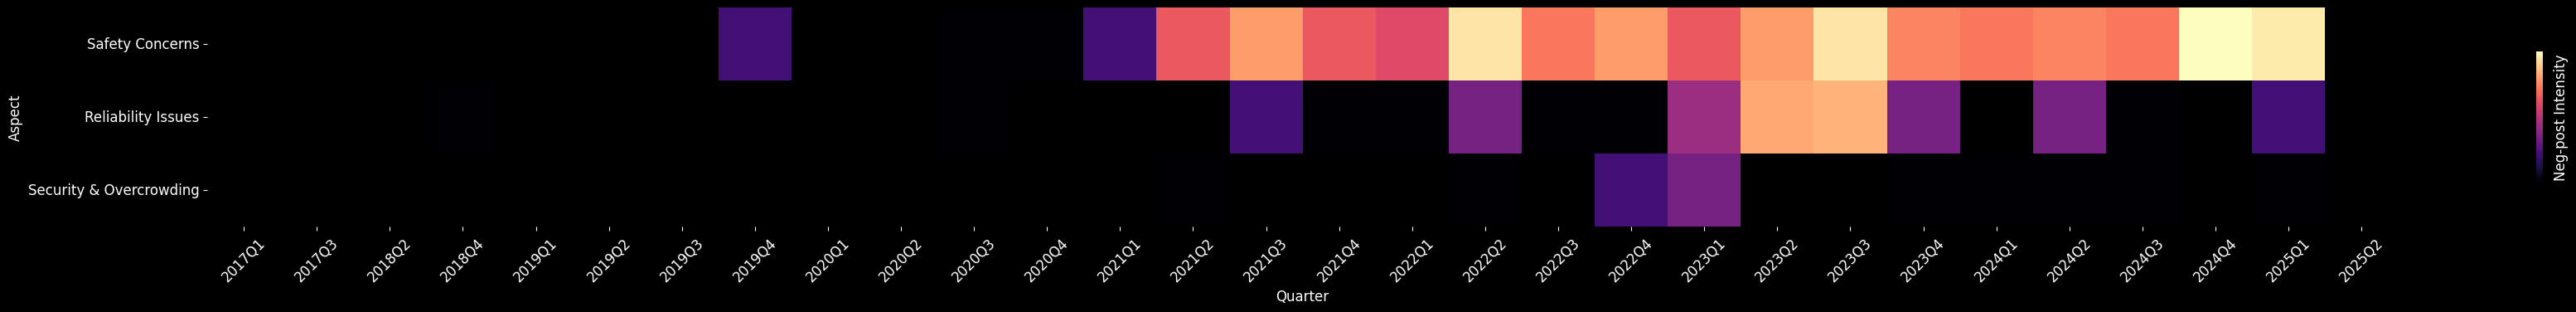

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# 1. Load & preprocess
df = pd.read_csv("sewclean.csv")
df['date']    = pd.to_datetime(df['date'])
df['quarter'] = df['date'].dt.to_period('Q').astype(str)

# 2. Filter for negative posts
sent_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sent_score'] = df['sentiment'].map(sent_map)
df_neg = df[df['sent_score'] <= -0.5].copy()

# 3. Capitalize emotion labels
df_neg['emotion'] = df_neg['emotion'].astype(str).str.title()

# 4. Combine "Security Threats" & "Overcrowding" into one bucket
aspect_keywords_neg = {
    "Safety Concerns": [
        "rain", "storm", "flood", "wet", "slippery", "accident", "collision", "ice", "lluvia"
    ],
    "Reliability Issues": [
        "breakdown", "delay", "cancelled", "canceled", "malfunction",
        "service interruption", "maintenance"
    ],
    "Security & Overcrowding": [
        "theft", "burglary", "robbery", "pickpocket", "vandalism",
        "shooting", "kidnapping", "guns",
        "crowded", "overcrowding", "packed", "no space",
        "standing room", "lines", "cues", "security threads",
        "seguridad", "inseguro", "lleno", "llenos", "ratas",
        "pistolas", "armas", "seguro", "inseguridad"
    ]
}

# 5. Build empty DataFrame for negative-post heatmap
quarters = sorted(df_neg['quarter'].unique(), key=lambda x: pd.Period(x))
heat_neg = pd.DataFrame(0, index=aspect_keywords_neg.keys(), columns=quarters)

# 6. Count mentions per aspect per quarter
for aspect, kws in aspect_keywords_neg.items():
    pat = "|".join(kws)
    mask = df_neg['content_en'].str.contains(pat, case=False, na=False)
    counts = df_neg.loc[mask].groupby('quarter').size()
    heat_neg.loc[aspect, counts.index] = counts.values

# 7. Plot the updated heatmap
plt.figure(figsize=(heat_neg.shape[1]*1.2, heat_neg.shape[0]*1.2), facecolor='black')
ax = sns.heatmap(
    heat_neg,
    cmap="magma",
    norm=LogNorm(vmin=1, vmax=heat_neg.values.max()),
    annot=False,
    cbar=True,
    cbar_kws={'label':'Neg-post Intensity', 'shrink':0.6},
    linewidths=0,
    square=True
)
# Style the colorbar and axes
cbar = ax.collections[0].colorbar
cbar.set_ticks([]); cbar.set_label('Neg-post Intensity', color='white', fontsize=12)
ax.set_facecolor('black')
ax.set_xlabel('Quarter', color='white', fontsize=12)
ax.set_ylabel('Aspect', color='white', fontsize=12)
ax.tick_params(axis='x', colors='white', rotation=45, labelsize=12)
ax.tick_params(axis='y', colors='white', rotation=0, labelsize=12)
plt.gcf().patch.set_facecolor('black')
plt.tight_layout()
plt.show()


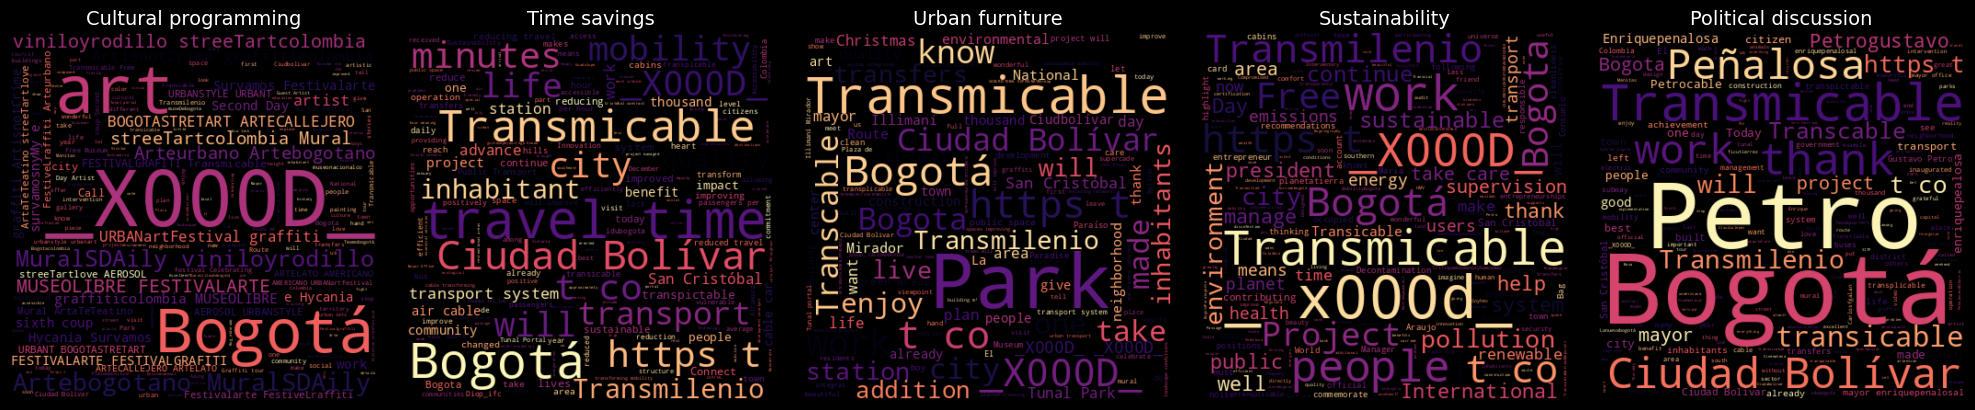

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Load and filter positive posts
df = pd.read_csv("sewclean.csv")
# Map sentiment to numeric
df['sent_score'] = df['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
df_pos = df[df['sent_score'] >= 0.5].copy()

# 2. Define aspect→keywords mapping
aspect_keywords = {
    "Cultural programming": [
        "cine al aire libre", "open-air cinema", "cine al aire",
        "exposición artística", "art exhibit", "art show", "museo móvil",
        "museo", "gallery", "galería", "taller de arte", "art workshop",
        "festival cultural", "cultural festival"
    ],
    "Time savings": [
        "no traffic", "sin trancones", "short commute", "travel time",
        "direct route", "fast access", "acceso rápido", "sin demoras"
    ],
    "Urban furniture": [
        "street furniture", "mobiliario urbano", "bike parking",
        "public benches", "basureros", "iluminación", "señalización",
        "green areas", "park", "parques"
    ],
    "Sustainability": [
        "eco-friendly", "sostenible", "green corridor", "energía limpia",
        "renewable", "transporte sostenible", "pollution", "cleanliness"
    ],
    "Political discussion": [
        "penalosa", "peñalosa", "petro", "alcalde", "política", "elección"
    ]
}

# 3. Set up subplots
n = len(aspect_keywords)
fig, axes = plt.subplots(1, n, figsize=(n*4, 4), facecolor='black')

# 4. Generate one word cloud per aspect
for ax, (aspect, keywords) in zip(axes, aspect_keywords.items()):
    pattern = "|".join(keywords)
    texts = df_pos.loc[
        df_pos['content_en'].str.contains(pattern, case=False, na=False),
        'content_en'
    ].dropna().astype(str)
    combined_text = " ".join(texts)
    wc = WordCloud(
        background_color='black',
        colormap='magma',
        width=400, height=400
    ).generate(combined_text)
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(aspect, color='white', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex
from scipy.interpolate import make_interp_spline

# ─── 1) Load & prep ─────────────────────────────────────────────
df = pd.read_csv("sewclean.csv", parse_dates=["date"])
df['emotion'] = df['emotion'].astype(str).str.title()
df['quarter'] = df['date'].dt.to_period("Q").astype(str)

# ─── 2) Treemap of overall emotion shares ──────────────────────
emotion_counts = (
    df['emotion']
      .value_counts()
      .reset_index()
      .rename(columns={"index":"emotion", "emotion":"count"})
)
palette = sns.color_palette("magma", n_colors=len(emotion_counts))
colors = [to_hex(c) for c in palette]
# Corrected label construction:
labels = emotion_counts.apply(
    lambda r: f"{r['emotion']}\n{int(r['count'])}",
    axis=1
)

plt.rcParams['font.family'] = 'Helvetica Neue'
# … then continue with your treemap plot as before …
fig, ax = plt.subplots(figsize=(6,6), facecolor='black')
squarify.plot(
    sizes=emotion_counts['count'],
    label=labels,
    color=colors,
    alpha=1,
    edgecolor='white',
    linewidth=1,
    text_kwargs={'fontsize':14, 'color':'white'}
)
ax.axis('off')
plt.tight_layout()
plt.show()

# ─── 3) Quarterly emotion timeline (stacked area) ─────────────
trend = (
    df.groupby(['quarter','emotion'])
      .size()
      .reset_index(name='count')
      .pivot(index='quarter', columns='emotion', values='count')
      .fillna(0)
)

# sort quarters
trend.index = pd.to_datetime(trend.index.str.replace(" Q","-Q"))
trend = trend.sort_index()
trend.index = trend.index.to_period("Q").astype(str)

# smooth X axis
x = np.arange(len(trend))
x_smooth = np.linspace(x.min(), x.max(), 500)

fig, ax = plt.subplots(figsize=(16,5), facecolor='black')
bottom = np.zeros_like(x_smooth)

for i, emo in enumerate(trend.columns):
    y = trend[emo].values
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)
    ax.fill_between(
        x_smooth,
        bottom,
        bottom + y_smooth,
        color=colors[i],
        edgecolor='white',
        linewidth=0.6,
        alpha=0.7
    )
    bottom += y_smooth

# styling
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
for s in ['top','right']:
    ax.spines[s].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')
ax.set_xticks(x[::2])
ax.set_xticklabels(trend.index[::2], rotation=45, ha='right', color='white')
ax.set_ylabel("Post count", color='white')
plt.tight_layout()
plt.show()


KeyError: 'emotion'

In [ ]:
!pip install squarify

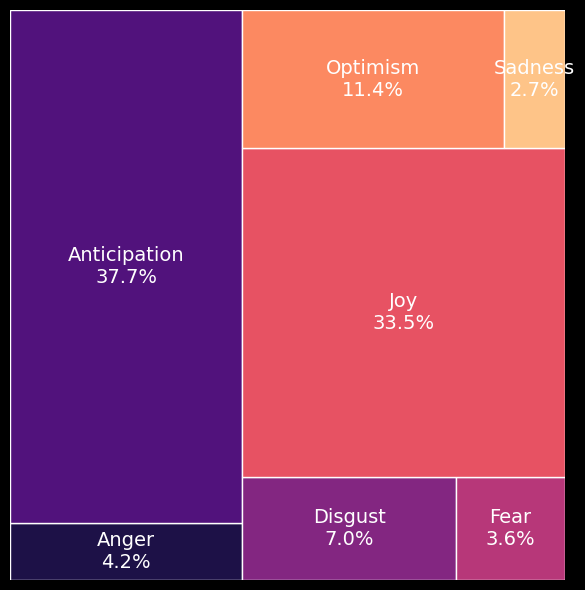

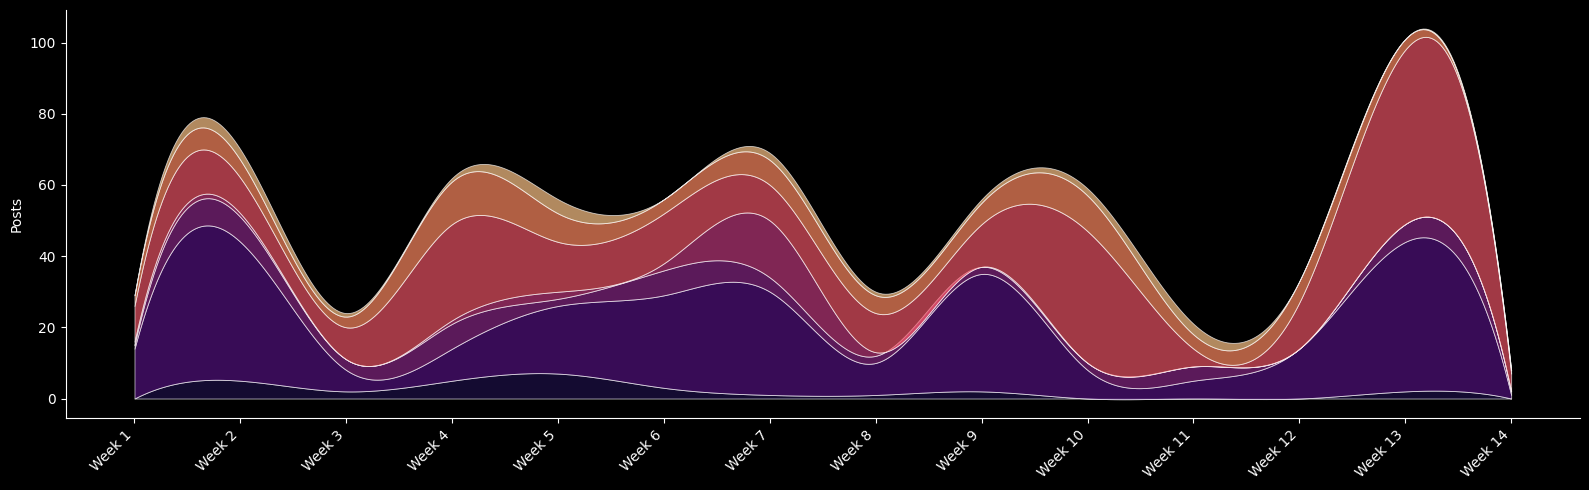

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex
from scipy.interpolate import make_interp_spline

# 1) Load & prepare
df = pd.read_csv("sewclean.csv", parse_dates=["date"])
df.columns = df.columns.str.strip()
df["emotion"] = df["emotion"].astype(str).str.title()

# restrict to Q4-2024 and drop Na/Nan emotions
mask_q4 = (df["date"] >= "2024-10-01") & (df["date"] <= "2024-12-31")
df_q4 = df.loc[mask_q4 & (df["emotion"].str.lower() != "nan")].copy()

# compute week number within Q4
df_q4["week_num"] = ((df_q4["date"] - pd.Timestamp("2024-10-01"))
                      .dt.days // 7 + 1).astype(int)

# 2) Aggregate counts
emotion_counts = (
    df_q4["emotion"]
      .value_counts()
      .rename_axis("emotion")
      .reset_index(name="count")
)
total = emotion_counts["count"].sum()
emotion_counts["pct"] = 100 * emotion_counts["count"] / total

weekly = (
    df_q4
      .groupby(["week_num","emotion"])
      .size()
      .reset_index(name="count")
      .pivot(index="week_num", columns="emotion", values="count")
      .fillna(0)
      .sort_index()
)
emotions = weekly.columns.tolist()

# 3) Build shared magma palette
palette = sns.color_palette("magma", n_colors=len(emotions))
colors  = [to_hex(c) for c in palette]

# 4) Plot treemap with percentages inside cells
labels = [
    f"{emo}\n{emotion_counts.loc[emotion_counts.emotion==emo,'pct'].iloc[0]:.1f}%"
    for emo in emotions
]
sizes = [
    int(emotion_counts.loc[emotion_counts.emotion==emo,'count'].iloc[0])
    for emo in emotions
]

plt.rcParams["font.family"] = "Helvetica Neue"
fig, ax = plt.subplots(figsize=(6,6), facecolor="black")

squarify.plot(
    sizes     = sizes,
    label     = labels,
    color     = colors,
    edgecolor = "white",
    linewidth = 1,
    text_kwargs={'fontsize':14, 'color':'white'}
)
ax.axis("off")
plt.tight_layout()
plt.show()

# 5) Plot weekly stacked area chart with week numbers
x = np.arange(len(weekly))
x_smooth = np.linspace(x.min(), x.max(), 500)

fig, ax = plt.subplots(figsize=(16,5), facecolor="black")
bottom = np.zeros_like(x_smooth)

for i, emo in enumerate(emotions):
    y      = weekly[emo].values
    spline = make_interp_spline(x, y, k=3)(x_smooth)
    ax.fill_between(
        x_smooth,
        bottom,
        bottom + spline,
        color=colors[i],
        edgecolor="white",
        linewidth=0.6,
        alpha=0.7
    )
    bottom += spline

# minimal styling
ax.set_facecolor("black")
fig.patch.set_facecolor("black")
for sp in ["top","right"]:
    ax.spines[sp].set_visible(False)
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.tick_params(colors="white")

# X-axis: Week 1, Week 2, ...
ax.set_xticks(x)
ax.set_xticklabels([f"Week {n}" for n in weekly.index],
                   rotation=45, ha="right", color="white")

ax.set_ylabel("Posts", color="white")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex

# 1. Load and clean column names
df = pd.read_csv("sewclean.csv", parse_dates=["date"])
df.columns = df.columns.str.strip()               # drop any hidden whitespace
print("Columns in DF:", df.columns.tolist())      # confirm ‘emotion’ is exactly here


Columns in DF: ['id', 'Origin', 'content', 'content_en', 'topic', 'sentiment', 'emotion', 'Likes', 'Time', 'ownerUsername', 'url', 'p_negative', 'p_neutral', 'p_positive', 'topic_prob', 'p_anger', 'p_joy', 'p_optimism', 'p_sadness', 'date', 'quarter', 'month']


In [ ]:

# 2. If it shows up as e.g. “Emotion” or " emotion", normalize to lowercase
if "emotion" not in df.columns:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    print("After lower+strip:", df.columns.tolist())

# 3. Now build the count DataFrame
emotion_counts = (
    df["emotion"]
      .value_counts()                            # Series now: index=emotion, values=counts
      .rename_axis("emotion")                    # name the index
      .reset_index(name="count")                 # turn into DataFrame with columns ['emotion','count']
)


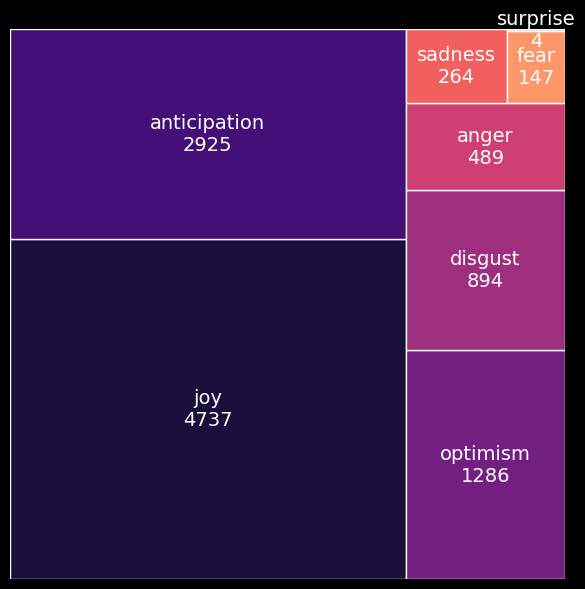

In [ ]:

# 4. Prepare labels & colors
labels = emotion_counts["emotion"] + "\n" + emotion_counts["count"].astype(int).astype(str)
palette = sns.color_palette("magma", n_colors=len(emotion_counts))
colors  = [ to_hex(c) for c in palette ]

# 5. Plot treemap
plt.rcParams['font.family'] = 'Helvetica Neue'
fig, ax = plt.subplots(figsize=(6,6), facecolor='black')
squarify.plot(
    sizes     = emotion_counts["count"],
    label     = labels,
    color     = colors,
    edgecolor = "white",
    linewidth = 1,
    text_kwargs={'fontsize':14, 'color':'white'}
)
ax.axis('off')
plt.tight_layout()
plt.show()


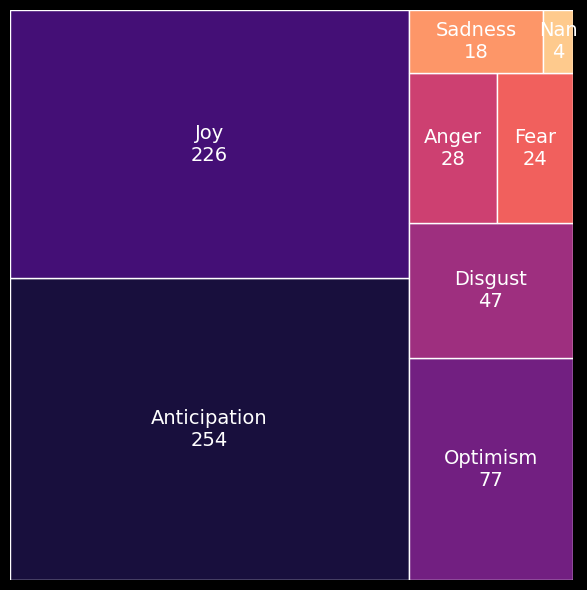

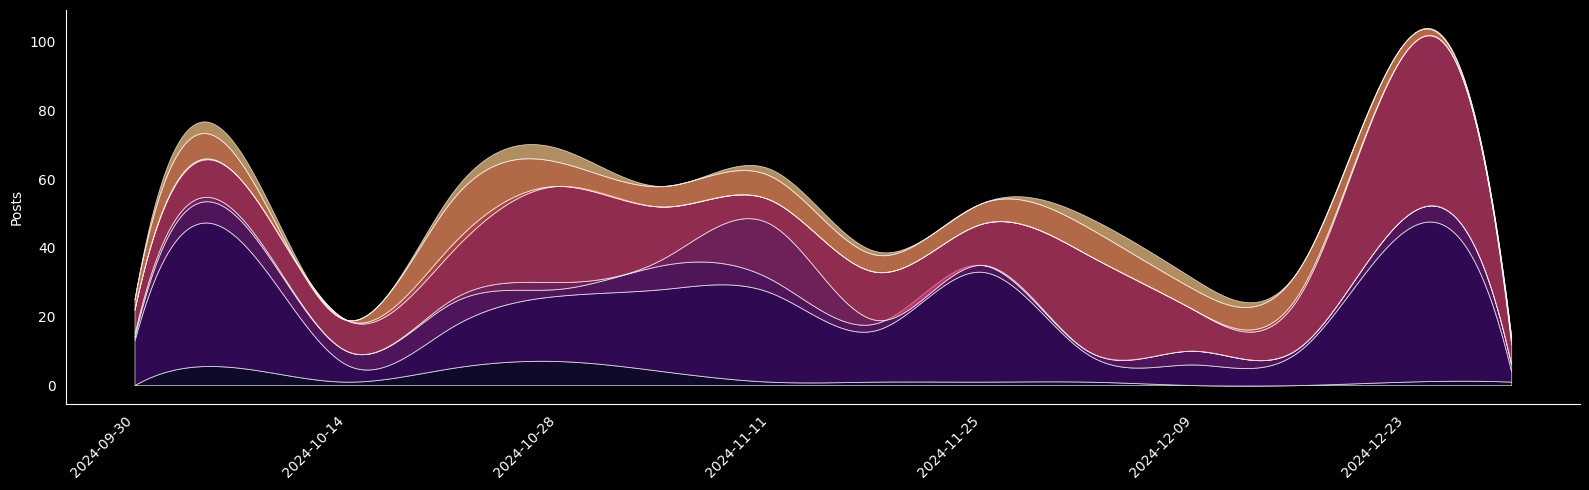

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex
from scipy.interpolate import make_interp_spline

# ─── 1) Load & prepare ────────────────────────────────────────────
df = pd.read_csv("sewclean.csv", parse_dates=["date"])
df.columns = df.columns.str.strip()                   # guard against stray spaces
df["emotion"] = df["emotion"].astype(str).str.title()

# restrict to Q4-2024
mask_q4 = (df["date"] >= "2024-10-01") & (df["date"] <= "2024-12-31")
df_q4 = df[mask_q4].copy()
df_q4 = df.loc[mask_q4 & (df["emotion"].str.lower() != "nan")].copy()

# compute week start dates
df_q4["week"] = df_q4["date"].dt.to_period("W").apply(lambda r: r.start_time)

# ─── 2) Treemap of emotion shares ─────────────────────────────────
emotion_counts = (
    df_q4["emotion"]
      .value_counts()
      .rename_axis("emotion")
      .reset_index(name="count")
)

# magma palette → hex
palette = sns.color_palette("magma", n_colors=len(emotion_counts))
colors  = [to_hex(c) for c in palette]

# labels: “Emotion\nCount”
labels = emotion_counts["emotion"] + "\n" + emotion_counts["count"].astype(int).astype(str)

plt.rcParams["font.family"] = "Helvetica Neue"
fig, ax = plt.subplots(figsize=(6,6), facecolor="black")
squarify.plot(
    sizes     = emotion_counts["count"],
    label     = labels,
    color     = colors,
    edgecolor = "white",
    linewidth = 1,
    text_kwargs={"fontsize":14, "color":"white"}
)
ax.axis("off")
plt.tight_layout()
plt.show()


# ─── 3) Weekly stacked area chart by emotion ───────────────────────
weekly = (
    df_q4
      .groupby(["week","emotion"])
      .size()
      .reset_index(name="count")
      .pivot(index="week", columns="emotion", values="count")
      .fillna(0)
      .sort_index()
)

# numeric x + smoothing
x        = np.arange(len(weekly))
x_smooth = np.linspace(x.min(), x.max(), 500)

fig, ax = plt.subplots(figsize=(16,5), facecolor="black")

bottom = np.zeros_like(x_smooth)
for i, emo in enumerate(weekly.columns):
    y        = weekly[emo].values
    spline   = make_interp_spline(x, y, k=3)(x_smooth)
    ax.fill_between(
        x_smooth,
        bottom,
        bottom + spline,
        color=colors[i],
        edgecolor="white",
        linewidth=0.6,
        alpha=0.7
    )
    bottom += spline

# styling
ax.set_facecolor("black")
fig.patch.set_facecolor("black")
for sp in ["top","right"]:
    ax.spines[sp].set_visible(False)
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.tick_params(colors="white")

# X-ticks: show week labels sparsely
ax.set_xticks(x[::2])
ax.set_xticklabels(
    [d.strftime("%Y-%m-%d") for d in weekly.index][::2],
    rotation=45, ha="right", color="white"
)

ax.set_ylabel("Posts", color="white")
plt.tight_layout()
plt.show()


<ipython-input-48-ac8794b7eb90>:56: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



TypeError: matplotlib.axes._axes.Axes.text() got multiple values for keyword argument 'va'

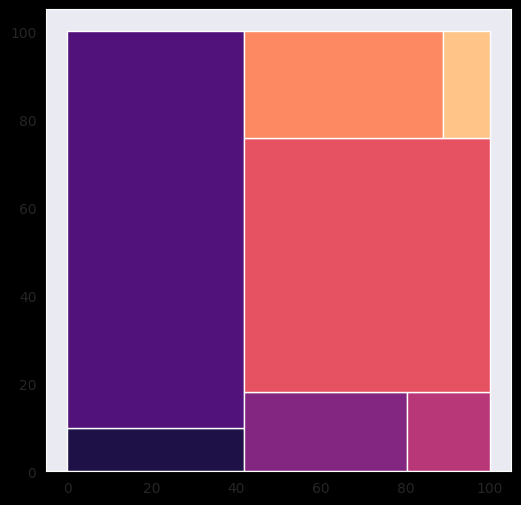

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex
from scipy.interpolate import make_interp_spline

# 1) Load & prepare
df = pd.read_csv("sewclean.csv", parse_dates=["date"])
df.columns = df.columns.str.strip()
df["emotion"] = df["emotion"].astype(str).str.title()

# restrict to Q4-2024 and drop Na/Nan emotions
mask_q4 = (df["date"] >= "2024-10-01") & (df["date"] <= "2024-12-31")
df_q4 = df[mask_q4].copy()
df_q4 = df_q4[df_q4["emotion"].str.lower() != "nan"]

# compute week number within Q4
df_q4["week_num"] = ((df_q4["date"] - pd.Timestamp("2024-10-01"))
                      .dt.days // 7 + 1).astype(int)

# 2) Aggregate counts
# Treemap counts
emotion_counts = (
    df_q4["emotion"]
      .value_counts()
      .rename_axis("emotion")
      .reset_index(name="count")
)

# Weekly area counts
weekly = (
    df_q4
      .groupby(["week_num","emotion"])
      .size()
      .reset_index(name="count")
      .pivot(index="week_num", columns="emotion", values="count")
      .fillna(0)
      .sort_index()
)

# ensure same emotion order
emotions = weekly.columns.tolist()

# 3) Build shared magma palette
palette = sns.color_palette("magma", n_colors=len(emotions))
colors  = [to_hex(c) for c in palette]

# 4) Plot treemap with matching colors
labels = [
    f"{emo}\n{int(emotion_counts.loc[emotion_counts.emotion==emo,'count'])}"
    for emo in emotions
]
sizes = [int(emotion_counts.loc[emotion_counts.emotion==emo,'count']) for emo in emotions]

plt.rcParams["font.family"] = "Helvetica Neue"
fig, ax = plt.subplots(figsize=(6,6), facecolor="black")
squarify.plot(
    sizes     = sizes,
    label     = labels,
    color     = colors,
    edgecolor = "white",
    linewidth = 1,
    text_kwargs={'fontsize':14, 'color':'white'}
)
ax.axis("off")
plt.tight_layout()
plt.show()

# 5) Plot weekly stacked area chart with week numbers
x = np.arange(len(weekly))
x_smooth = np.linspace(x.min(), x.max(), 500)

fig, ax = plt.subplots(figsize=(16,5), facecolor="black")
bottom = np.zeros_like(x_smooth)
for i, emo in enumerate(emotions):
    y       = weekly[emo].values
    spline  = make_interp_spline(x, y, k=3)(x_smooth)
    ax.fill_between(
        x_smooth,
        bottom,
        bottom + spline,
        color=colors[i],
        edgecolor="white",
        linewidth=0.6,
        alpha=0.7
    )
    bottom += spline

# Styling
ax.set_facecolor("black")
fig.patch.set_facecolor("black")
for sp in ["top","right"]:
    ax.spines[sp].set_visible(False)
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.tick_params(colors="white")

# X-axis: Week 1, Week 2, ...
ax.set_xticks(x)
ax.set_xticklabels([f"Week {n}" for n in weekly.index], rotation=45, ha="right", color="white")

ax.set_ylabel("Posts", color="white")
plt.tight_layout()
plt.show()


<ipython-input-49-ac8794b7eb90>:56: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



TypeError: matplotlib.axes._axes.Axes.text() got multiple values for keyword argument 'va'

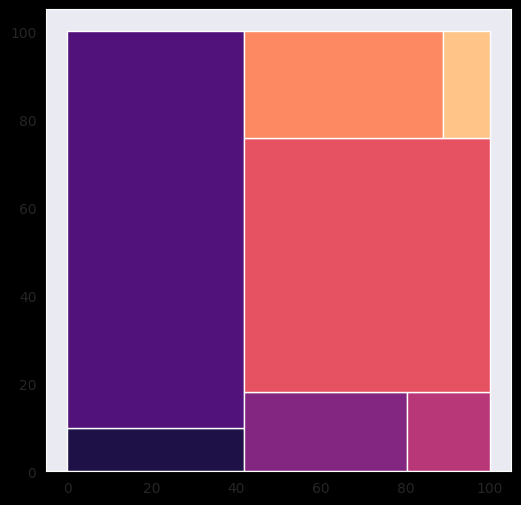

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex
from scipy.interpolate import make_interp_spline

# 1) Load & prepare
df = pd.read_csv("sewclean.csv", parse_dates=["date"])
df.columns = df.columns.str.strip()
df["emotion"] = df["emotion"].astype(str).str.title()

# restrict to Q4-2024 and drop Na/Nan emotions
mask_q4 = (df["date"] >= "2024-10-01") & (df["date"] <= "2024-12-31")
cc

# compute week number within Q4
df_q4["week_num"] = ((df_q4["date"] - pd.Timestamp("2024-10-01"))
                      .dt.days // 7 + 1).astype(int)

# 2) Aggregate counts
# Treemap counts
emotion_counts = (
    df_q4["emotion"]
      .value_counts()
      .rename_axis("emotion")
      .reset_index(name="count")
)
total = emotion_counts["count"].sum()
emotion_counts["pct"] = 100 * emotion_counts["count"] / total

# Weekly area counts
weekly = (
    df_q4
      .groupby(["week_num","emotion"])
      .size()
      .reset_index(name="count")
      .pivot(index="week_num", columns="emotion", values="count")
      .fillna(0)
      .sort_index()
)

# ensure same emotion order
emotions = weekly.columns.tolist()

# 3) Build shared magma palette
palette = sns.color_palette("magma", n_colors=len(emotions))
colors  = [to_hex(c) for c in palette]

# 4) Plot treemap with percentages inside cells
labels = [
    f"{emo}\n{emotion_counts.loc[emotion_counts.emotion==emo,'pct'].item():.1f}%"
    for emo in emotions
]
sizes = [int(emotion_counts.loc[emotion_counts.emotion==emo,'count']) for emo in emotions]

plt.rcParams["font.family"] = "Helvetica Neue"
fig, ax = plt.subplots(figsize=(6,6), facecolor="black")

squarify.plot(
    sizes     = sizes,
    label     = labels,
    color     = colors,
    edgecolor = "white",
    linewidth = 1,
    text_kwargs={
        'fontsize': 14,
        'color':     'white',
        'va':        'center',
        'ha':        'center'
    }
)

ax.axis("off")
plt.tight_layout()
plt.show()

# 5) Plot weekly stacked area chart with week numbers
x = np.arange(len(weekly))
x_smooth = np.linspace(x.min(), x.max(), 500)

fig, ax = plt.subplots(figsize=(16,5), facecolor="black")
bottom = np.zeros_like(x_smooth)
for i, emo in enumerate(emotions):
    y      = weekly[emo].values
    spline = make_interp_spline(x, y, k=3)(x_smooth)
    ax.fill_between(
        x_smooth,
        bottom,
        bottom + spline,
        color=colors[i],
        edgecolor="white",
        linewidth=0.6,
        alpha=0.7
    )
    bottom += spline

# Styling
ax.set_facecolor("black")
fig.patch.set_facecolor("black")
for sp in ["top","right"]:
    ax.spines[sp].set_visible(False)
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.tick_params(colors="white")

# X-axis: Week 1, Week 2, ...
ax.set_xticks(x)
ax.set_xticklabels([f"Week {n}" for n in weekly.index], rotation=45, ha="right", color="white")

ax.set_ylabel("Posts", color="white")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from plotly import graph_objects as go
from statsmodels.stats.proportion import proportions_ztest   # already used above

# ──────────────────────────────────────────────────────────────
# 1)  Load data and basic preprocessing
# ──────────────────────────────────────────────────────────────
df = pd.read_csv("sewclean.csv")
df['date'] = pd.to_datetime(df['date'])

# Map sentiment labels to a numeric score
sent_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sent_score'] = df['sentiment'].map(sent_map)

# Keep only strongly positive posts (score ≥ 0.5 from your earlier pipeline)
df_pos = df[df['sent_score'] >= 0.5].copy()

# Standardise emotion labels and drop rare negative ones if you wish
df_pos['emotion'] = df_pos['emotion'].astype(str).str.title()
df_pos = df_pos[~df_pos['emotion'].isin(['Fear', 'Anger'])]

# ──────────────────────────────────────────────────────────────
# 2)  Define aspect → keyword lexicons
# ──────────────────────────────────────────────────────────────
aspect_keywords = {
    "Cultural programming": [
        "cine al aire libre","open-air cinema","cine al aire",
        "exposición artística","art exhibit","art show","museo","gallery",
        "taller de arte","art workshop","taller comunitario",
        "festival cultural","cultural festival","feria","evento cultural"
    ],
    "Time savings": [
        "no traffic","sin trancones","short commute","commute corto",
        "travel time","tiempo de viaje reducido","direct route","ruta directa",
        "fast access","acceso rápido","consistent timing","sin demoras"
    ],
    "Urban furniture": [
        "street furniture","mobiliario urbano","bike parking","parqueaderos bici",
        "public benches","bancos cómodos","waste bins","basureros",
        "lighting","iluminación","signage","señalización",
        "green areas","áreas verdes","park","parques","bancas"
    ],
    "Sustainability": [
        "eco-friendly","sostenible","green corridor","corredor verde",
        "clean energy","energía limpia","renewable","renovable",
        "sustainable transport","transporte sostenible",
        "pollution","contaminación","trash","cleanliness"
    ]
}

# Flag each positive post per aspect
for aspect, kw in aspect_keywords.items():
    pattern = "|".join(kw)
    df_pos[aspect] = df_pos['content_en'].str.contains(pattern, case=False, na=False)

# ──────────────────────────────────────────────────────────────
# 3)  Build aspect × emotion frequency matrix
# ──────────────────────────────────────────────────────────────
emotions = sorted(df_pos['emotion'].unique())
matrix = pd.DataFrame(0, index=aspect_keywords.keys(), columns=emotions)

for aspect in aspect_keywords:
    for emo in emotions:
        matrix.at[aspect, emo] = df_pos[df_pos[aspect] & (df_pos['emotion'] == emo)].shape[0]

# ──────────────────────────────────────────────────────────────
# 4)  Reshape to long form for the sunburst  ← fixed column names
# ──────────────────────────────────────────────────────────────
long = (
    matrix
      .loc[:, ['Joy', 'Optimism', 'Anticipation']]      # choose three emotions
      .stack()                                          # wide → long
      .reset_index()                                    # bring indices into cols
      .rename(columns={'level_0': 'aspect',             # <-- key fix
                       'level_1': 'emotion',
                       0: 'count'})
      .query('count > 0')
)

# ──────────────────────────────────────────────────────────────
# 5)  Build hierarchy vectors
# ──────────────────────────────────────────────────────────────
labels  = ['All aspects']
parents = ['']
values  = [long['count'].sum()]

for asp, grp in long.groupby('aspect'):
    labels.append(asp)
    parents.append('All aspects')
    values.append(grp['count'].sum())

    for _, row in grp.iterrows():
        labels.append(row['emotion'])
        parents.append(asp)
        values.append(row['count'])

# ──────────────────────────────────────────────────────────────
# 6)  Colour palette (magma) and tints
# ──────────────────────────────────────────────────────────────
palette = sns.color_palette("magma", n_colors=len(aspect_keywords))
aspect_colors = {a: f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'
                 for a,(r,g,b) in zip(aspect_keywords, palette)}

colors = ['black']   # root colour
for lab in labels[1:]:
    if lab in aspect_colors:
        colors.append(aspect_colors[lab])                       # aspect ring
    else:                                                       # emotion ring
        parent = parents[labels.index(lab)]
        r,g,b = [int(c) for c in aspect_colors[parent][4:-1].split(',')]
        colors.append(f'rgba({r},{g},{b},0.55)')                # 55 % opacity

# ──────────────────────────────────────────────────────────────
# 7)  Plot sunburst
# ──────────────────────────────────────────────────────────────
fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values = values,
    branchvalues = 'total',
    marker = dict(colors=colors, line=dict(width=1, color='white')),
    hovertemplate = '%{label}: %{value} posts<extra></extra>'
))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', family='Helvetica Neue', size=16),
    margin=dict(t=10, b=10, l=10, r=10)
)

fig.show()


In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex  # Import to_hex
from scipy.interpolate import make_interp_spline

# ... rest of your code ...

# ──────────────────────────────────────────────────────────────
# 1)  Load data and basic preprocessing
# ──────────────────────────────────────────────────────────────
df = pd.read_csv("sewclean.csv")
df['date'] = pd.to_datetime(df['date'])

# Map sentiment labels to a numeric score
sent_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sent_score'] = df['sentiment'].map(sent_map)

# Keep only strongly positive posts (score ≥ 0.5 from your earlier pipeline)
df_pos = df[df['sent_score'] >= 0.5].copy()

# Standardise emotion labels and drop rare negative ones if you wish
df_pos['emotion'] = df_pos['emotion'].astype(str).str.title()
df_pos = df_pos[~df_pos['emotion'].isin(['Fear', 'Anger'])]

# ──────────────────────────────────────────────────────────────
# 2)  Define aspect → keyword lexicons
# ──────────────────────────────────────────────────────────────
aspect_keywords = {
    "Cultural programming": [
        "cine al aire libre","open-air cinema","cine al aire",
        "exposición artística","art exhibit","art show","museo","gallery",
        "taller de arte","art workshop","taller comunitario",
        "festival cultural","cultural festival","feria","evento cultural"
    ],
    "Time savings": [
        "no traffic","sin trancones","short commute","commute corto",
        "travel time","tiempo de viaje reducido","direct route","ruta directa",
        "fast access","acceso rápido","consistent timing","sin demoras"
    ],
    "Urban furniture": [
        "street furniture","mobiliario urbano","bike parking","parqueaderos bici",
        "public benches","bancos cómodos","waste bins","basureros",
        "lighting","iluminación","signage","señalización",
        "green areas","áreas verdes","park","parques","bancas"
    ],
    "Sustainability": [
        "eco-friendly","sostenible","green corridor","corredor verde",
        "clean energy","energía limpia","renewable","renovable",
        "sustainable transport","transporte sostenible",
        "pollution","contaminación","trash","cleanliness"
    ]
}

# Flag each positive post per aspect
for aspect, kw in aspect_keywords.items():
    pattern = "|".join(kw)
    df_pos[aspect] = df_pos['content_en'].str.contains(pattern, case=False, na=False)

# ──────────────────────────────────────────────────────────────
# 3)  Build aspect × emotion frequency matrix
# ──────────────────────────────────────────────────────────────
emotions = sorted(df_pos['emotion'].unique())
matrix = pd.DataFrame(0, index=aspect_keywords.keys(), columns=emotions)

for aspect in aspect_keywords:
    for emo in emotions:
        matrix.at[aspect, emo] = df_pos[df_pos[aspect] & (df_pos['emotion'] == emo)].shape[0]

# ──────────────────────────────────────────────────────────────
# 4)  Reshape to long form for the sunburst  ← fixed column names
# ──────────────────────────────────────────────────────────────
long = (
    matrix
      .loc[:, ['Joy', 'Optimism', 'Anticipation']]      # choose three emotions
      .stack()                                          # wide → long
      .reset_index()                                    # bring indices into cols
      .rename(columns={'level_0': 'aspect',             # <-- key fix
                       'level_1': 'emotion',
                       0: 'count'})
      .query('count > 0')
)

# ──────────────────────────────────────────────────────────────
# 5)  Build hierarchy vectors
# ──────────────────────────────────────────────────────────────
labels  = ['All aspects']
parents = ['']
values  = [long['count'].sum()]

for asp, grp in long.groupby('aspect'):
    labels.append(asp)
    parents.append('All aspects')
    values.append(grp['count'].sum())

    for _, row in grp.iterrows():
        labels.append(row['emotion'])
        parents.append(asp)
        values.append(row['count'])

# ──────────────────────────────────────────────────────────────
# 6)  Colour palette (magma) and tints
# ──────────────────────────────────────────────────────────────
palette = sns.color_palette("magma", n_colors=len(aspect_keywords))
aspect_colors = {a: f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'
                 for a,(r,g,b) in zip(aspect_keywords, palette)}

colors = ['black']   # root colour
for lab in labels[1:]:
    if lab in aspect_colors:
        colors.append(aspect_colors[lab])                       # aspect ring
    else:                                                       # emotion ring
        parent = parents[labels.index(lab)]
        r,g,b = [int(c) for c in aspect_colors[parent][4:-1].split(',')]
        colors.append(f'rgba({r},{g},{b},0.55)')                # 55 % opacity

# ──────────────────────────────────────────────────────────────
# 7)  Plot sunburst
# ──────────────────────────────────────────────────────────────
fig = go.Figure(go.Sunburst(
    labels = labels,
    parents = parents,
    values = values,
    branchvalues = 'total',
    marker = dict(colors=colors, line=dict(width=1, color='white')),
    hovertemplate = '%{label}: %{value} posts<extra></extra>'
))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', family='Helvetica Neue', size=16),
    margin=dict(t=10, b=10, l=10, r=10)
)

fig.show()
# 8-bis ▸ build a tidy long table (aspect-emotion-count)  ---------------
long = (
    matrix
      .loc[:, ['Joy', 'Optimism', 'Anticipation']]      # pick 3 emotions
      .stack()                                          # wide → long
      .reset_index()                                    # indices → columns
      .rename(columns={'level_0': 'aspect',
                       'level_1': 'emotion',
                       0: 'count'})
)

# keep every (aspect, emotion) pair that has at least one match
long = long[long['count'] > 0]

# 9 ▸ create the hierarchical lists for Plotly  --------------------------
labels   = ['All aspects']                 # root
parents  = ['']                            # root has no parent
values   = [long['count'].sum()]           # total

for asp, sub in long.groupby('aspect'):
    # 1st ring  – aspect slice
    labels.append(asp)
    parents.append('All aspects')
    values.append(sub['count'].sum())

    # 2nd ring – each emotion under that aspect
    for _, row in sub.iterrows():
        labels.append(row['emotion'])
        parents.append(asp)
        values.append(row['count'])

# 10 ▸ colour map (magma, darker = outer ring)  --------------------------
palette = sns.color_palette('magma', n_colors=len(labels))
colors  = [to_hex(c) for c in palette]

# 11 ▸ plot the sunburst  -------------------------------------------------
fig = go.Figure(go.Sunburst(
        labels = labels,
        parents = parents,
        values  = values,
        branchvalues = 'total',
        marker = dict(colors=colors, line=dict(color='white', width=1))
))

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', family='Helvetica Neue'),
    margin=dict(t=20, l=0, r=0, b=20)
)

fig.show()